In [21]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import scipy.stats as st
import statsmodels.stats.multicomp as sm
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt
from pylab import rcParams
from tqdm.auto import tqdm
#df = pd.read_csv('/home/jupyter-a.mihejchik-8/Krypto/Dataframes/coin_Bitcoin.csv', sep = ',')
#df.dtypes

In [22]:
path = 'C:/Users/Lenovo/Cryptovaluta/Datasetiki'
os.listdir (path)

['coin_Aave.csv',
 'coin_BinanceCoin.csv',
 'coin_Bitcoin.csv',
 'coin_Bitcoin1.csv',
 'coin_Cardano.csv',
 'coin_ChainLink.csv',
 'coin_Cosmos.csv',
 'coin_CryptocomCoin.csv',
 'coin_Dogecoin.csv',
 'coin_EOS.csv',
 'coin_Ethereum.csv',
 'coin_Iota.csv',
 'coin_Litecoin.csv',
 'coin_Monero.csv',
 'coin_NEM.csv',
 'coin_Polkadot.csv',
 'coin_Solana.csv',
 'coin_Stellar.csv',
 'coin_Tether.csv',
 'coin_Tron.csv',
 'coin_Uniswap.csv',
 'coin_USDCoin.csv',
 'coin_WrappedBitcoin.csv',
 'coin_XRP.csv']

In [23]:
df = pd.DataFrame()
for (current_path, dirs, files) in os.walk(path):
    for file in files:
        data_path = (current_path + '//' + file)
        a = pd.read_csv(data_path, sep = ',')
        df = pd.concat((df, a))

In [24]:
df = df.fillna(0)

In [25]:
total = df.reset_index()
total.head(60)

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,...,1,Bitcoin,BTC,2013-04-29 23:59:59,147.48800659179688,134.0,134.44400024414062,144.5399932861328,0.0,1603768864.5
0,0,1.0,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3.0,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4.0,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5.0,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,6.0,Aave,AAVE,2020-10-10 23:59:59,51.405655,46.703328,46.818146,49.133718,1.074627e+06,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,7.0,Aave,AAVE,2020-10-11 23:59:59,51.453374,48.716040,49.133130,49.660726,6.921506e+05,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,8.0,Aave,AAVE,2020-10-12 23:59:59,54.421418,48.754077,49.661573,52.238692,1.354836e+06,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,9.0,Aave,AAVE,2020-10-13 23:59:59,57.481904,49.598735,52.238392,51.124317,1.386221e+06,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,10.0,Aave,AAVE,2020-10-14 23:59:59,57.853946,49.629529,51.372899,51.316518,3.132405e+06,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
total['Symbol'].unique()

array(['AAVE', 'BNB', 'BTC', 0, 'ADA', 'LINK', 'ATOM', 'CRO', 'DOGE',
       'EOS', 'ETH', 'MIOTA', 'LTC', 'XMR', 'XEM', 'DOT', 'SOL', 'XLM',
       'USDT', 'TRX', 'UNI', 'USDC', 'WBTC', 'XRP'], dtype=object)

In [27]:
total['Date'] = pd.to_datetime(total['Date'])

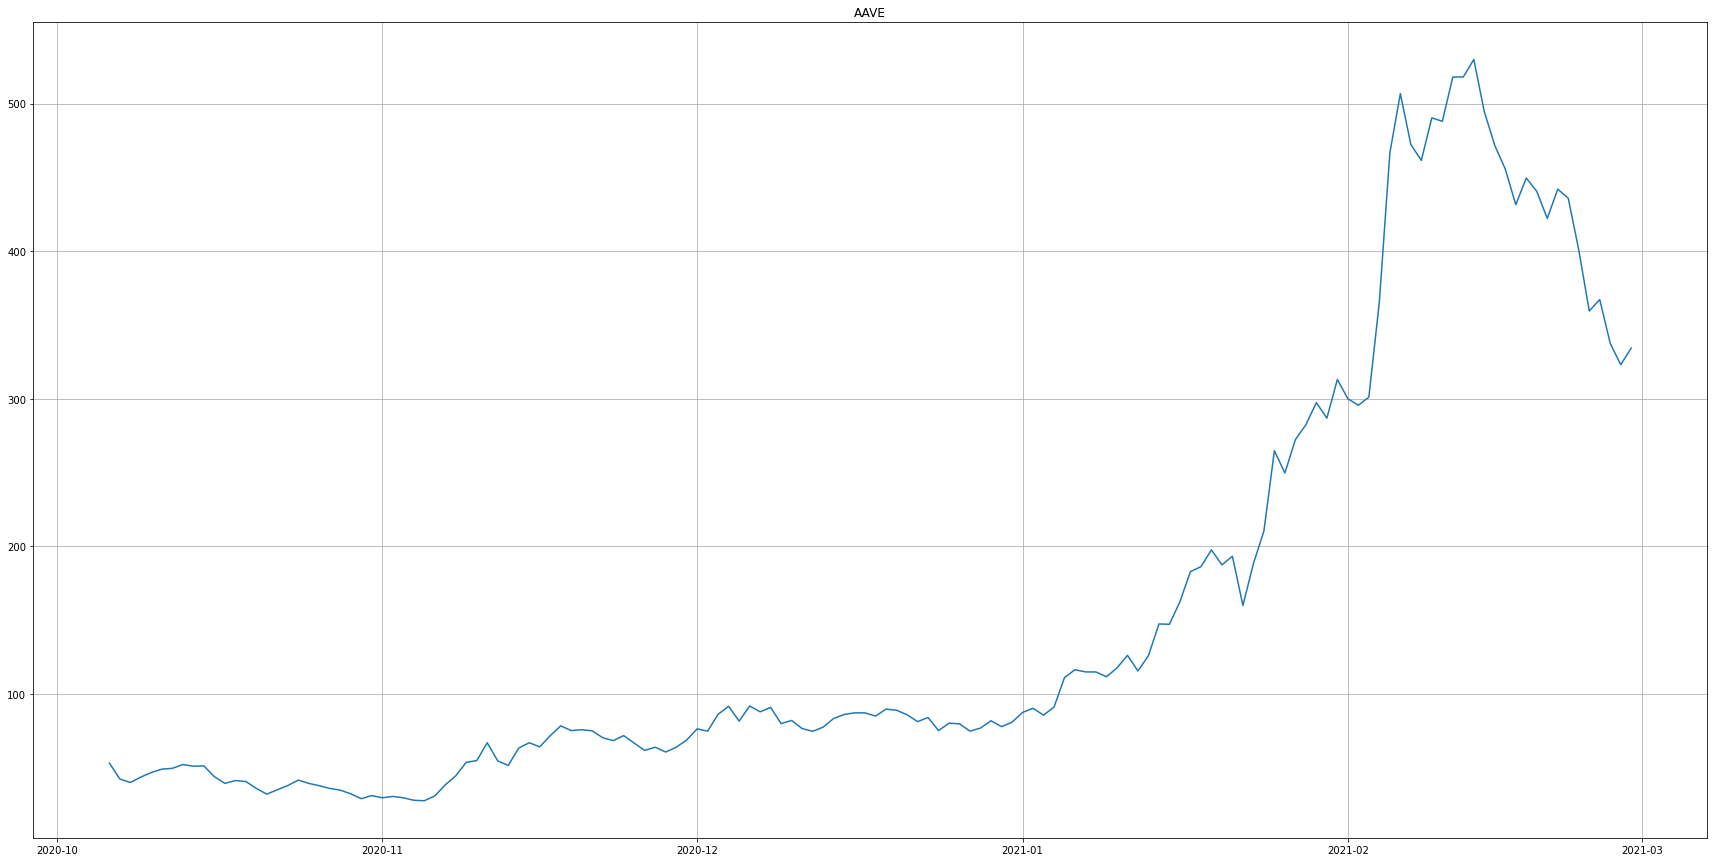

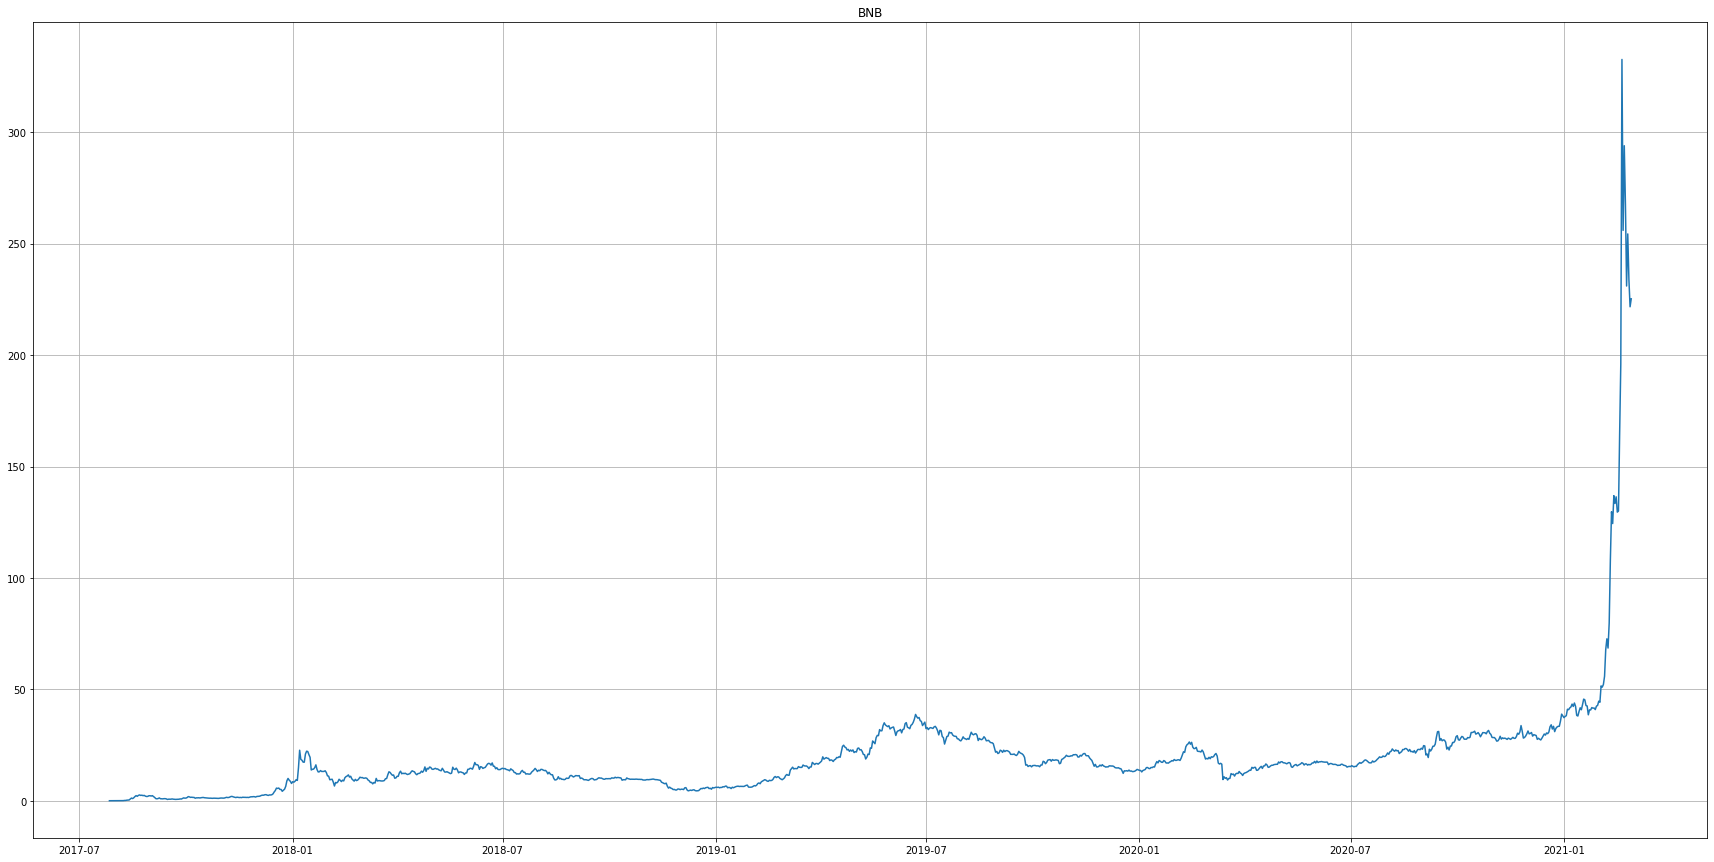

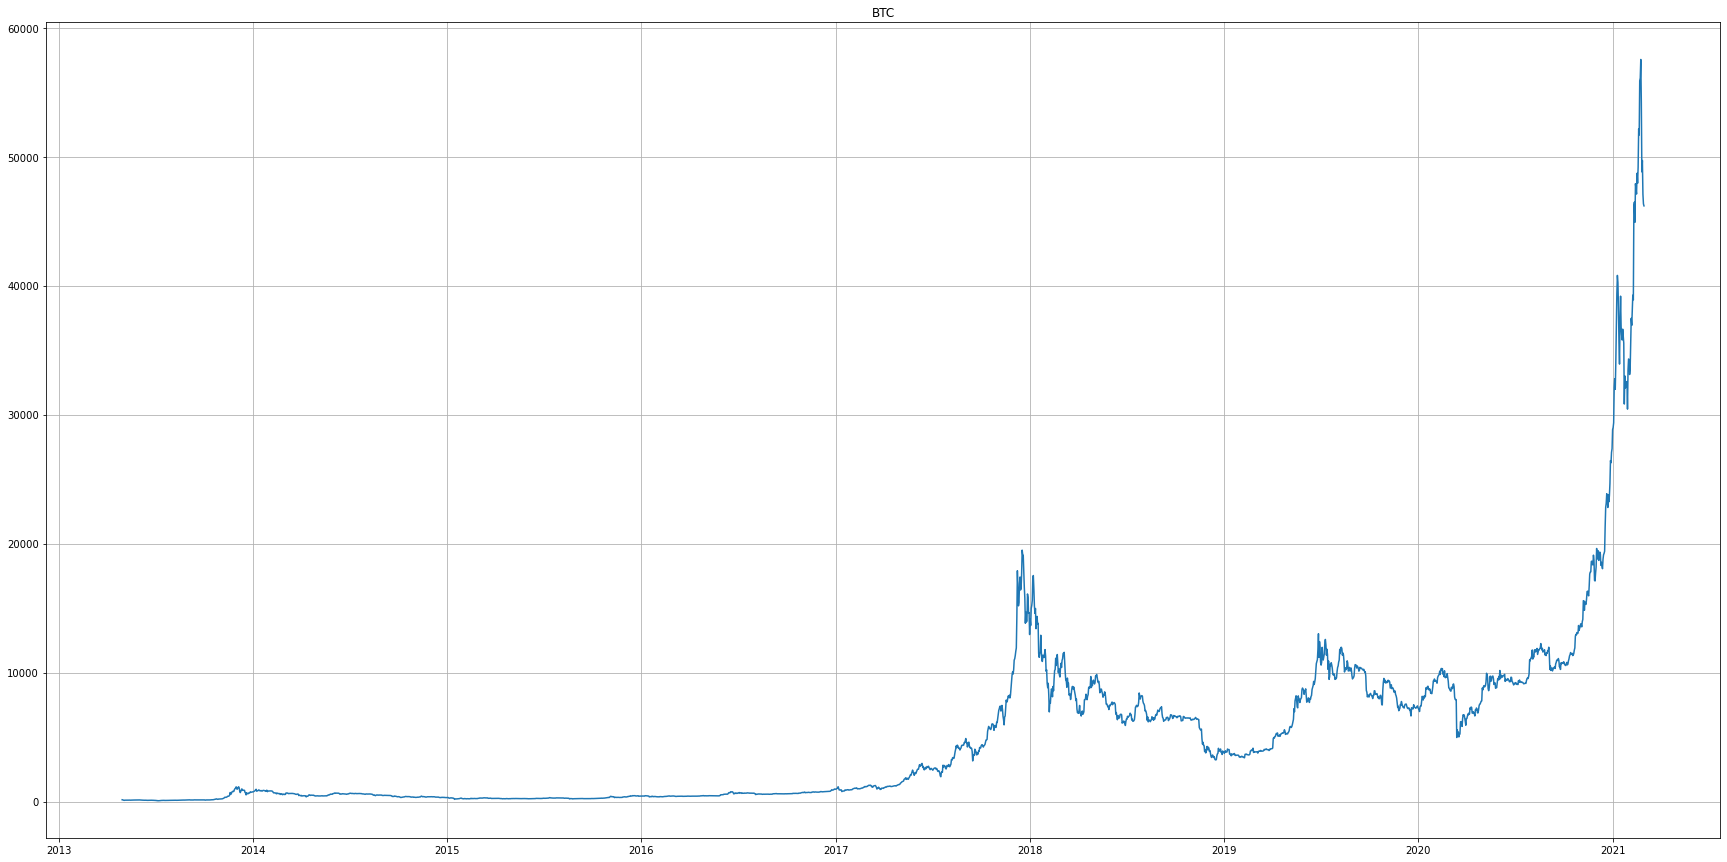

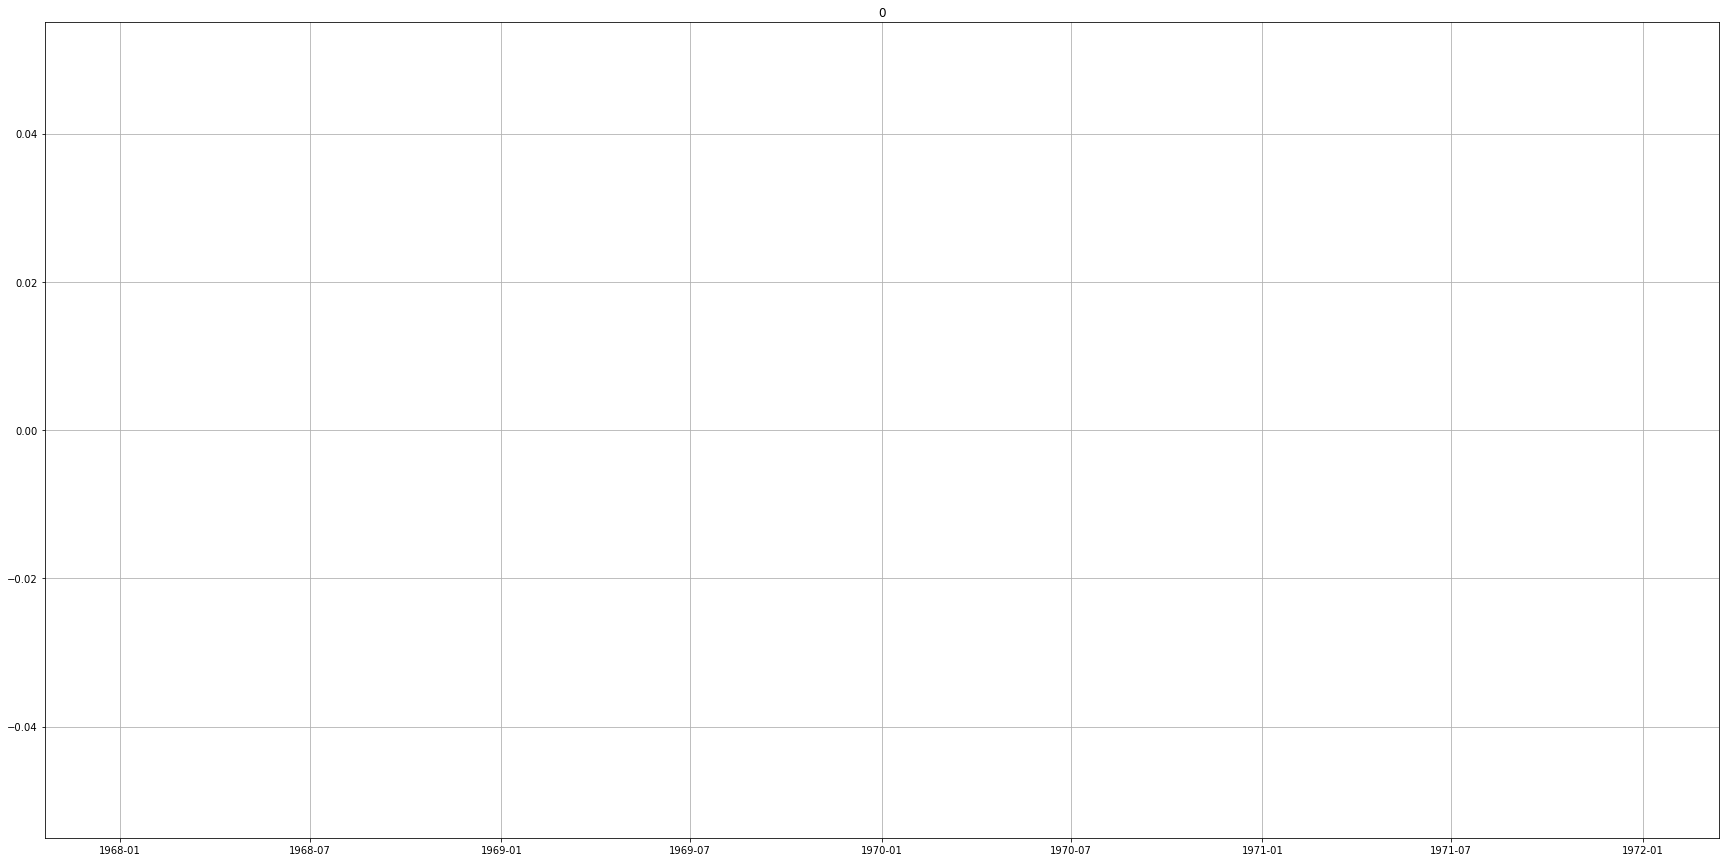

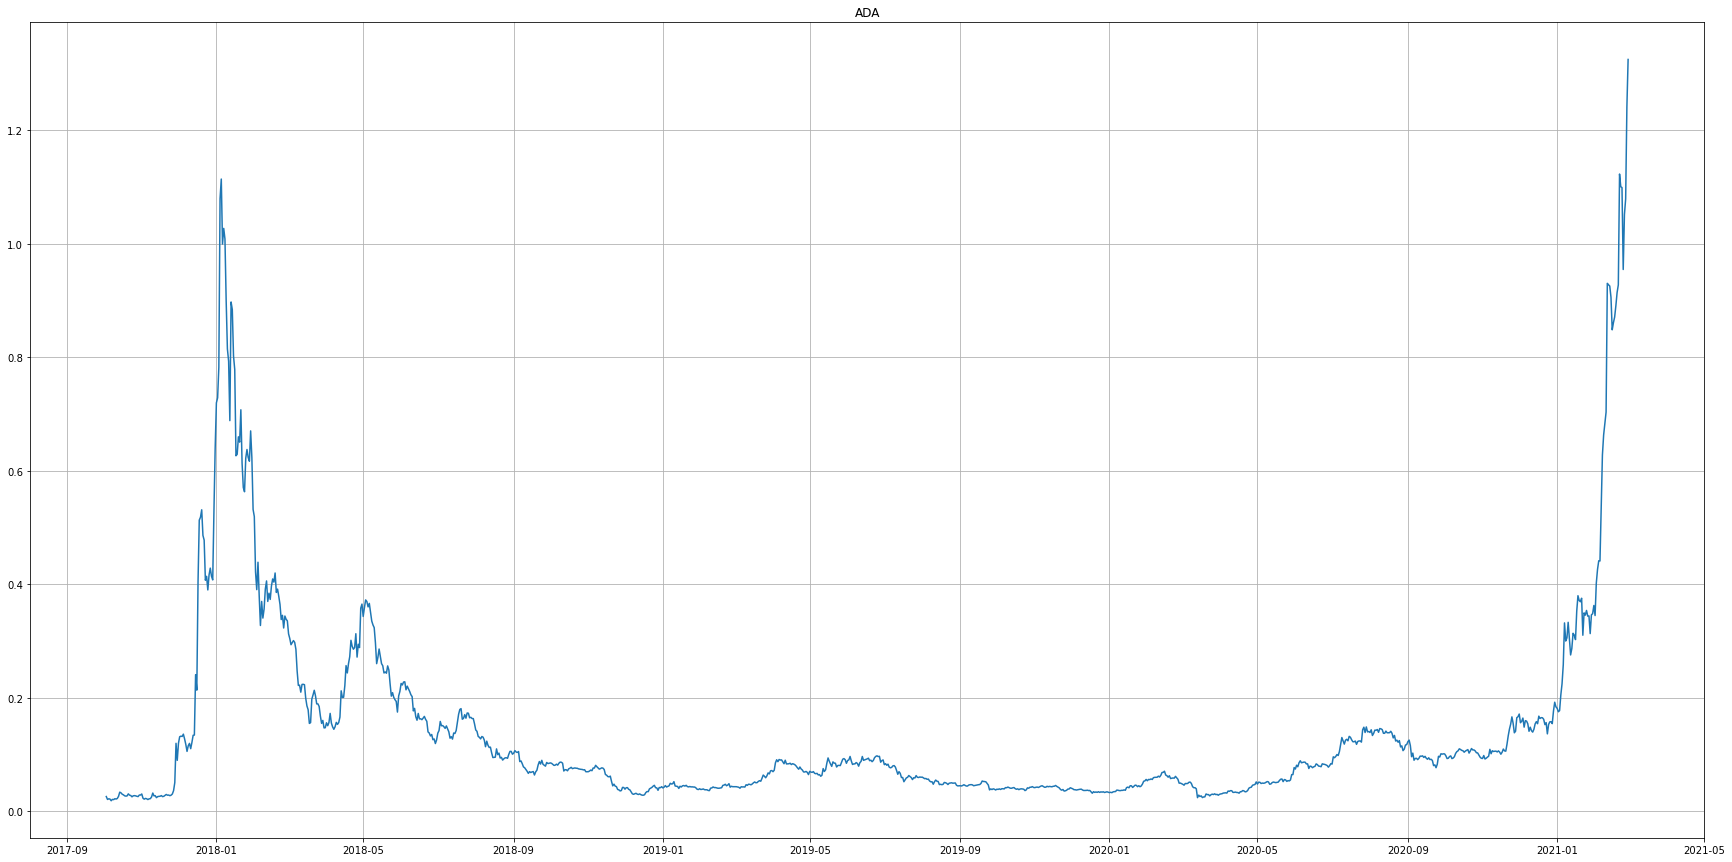

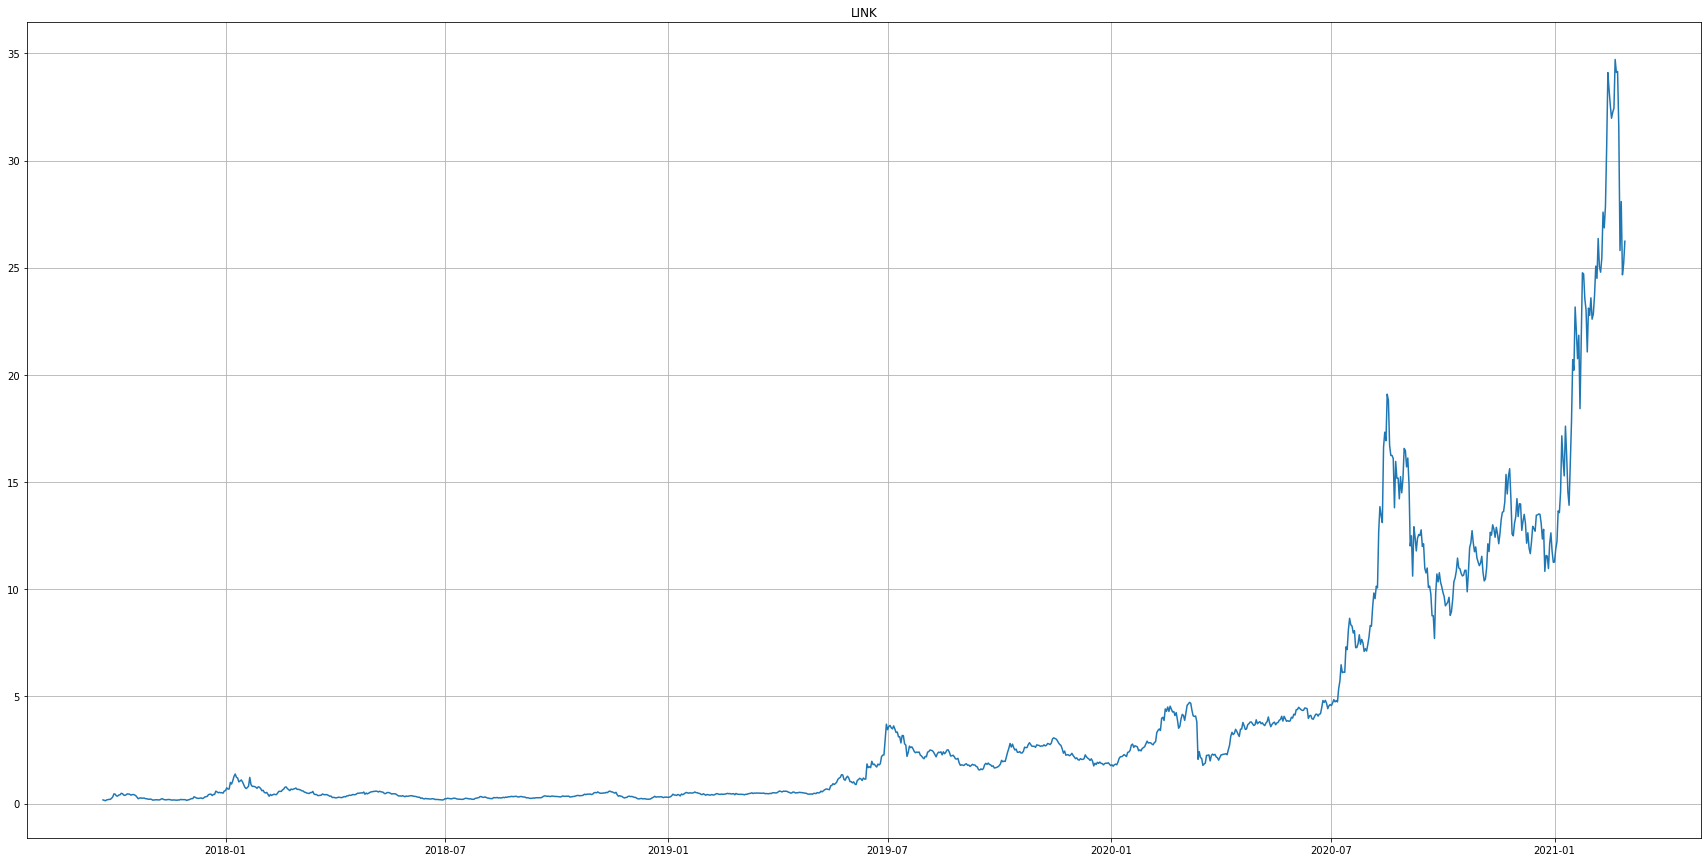

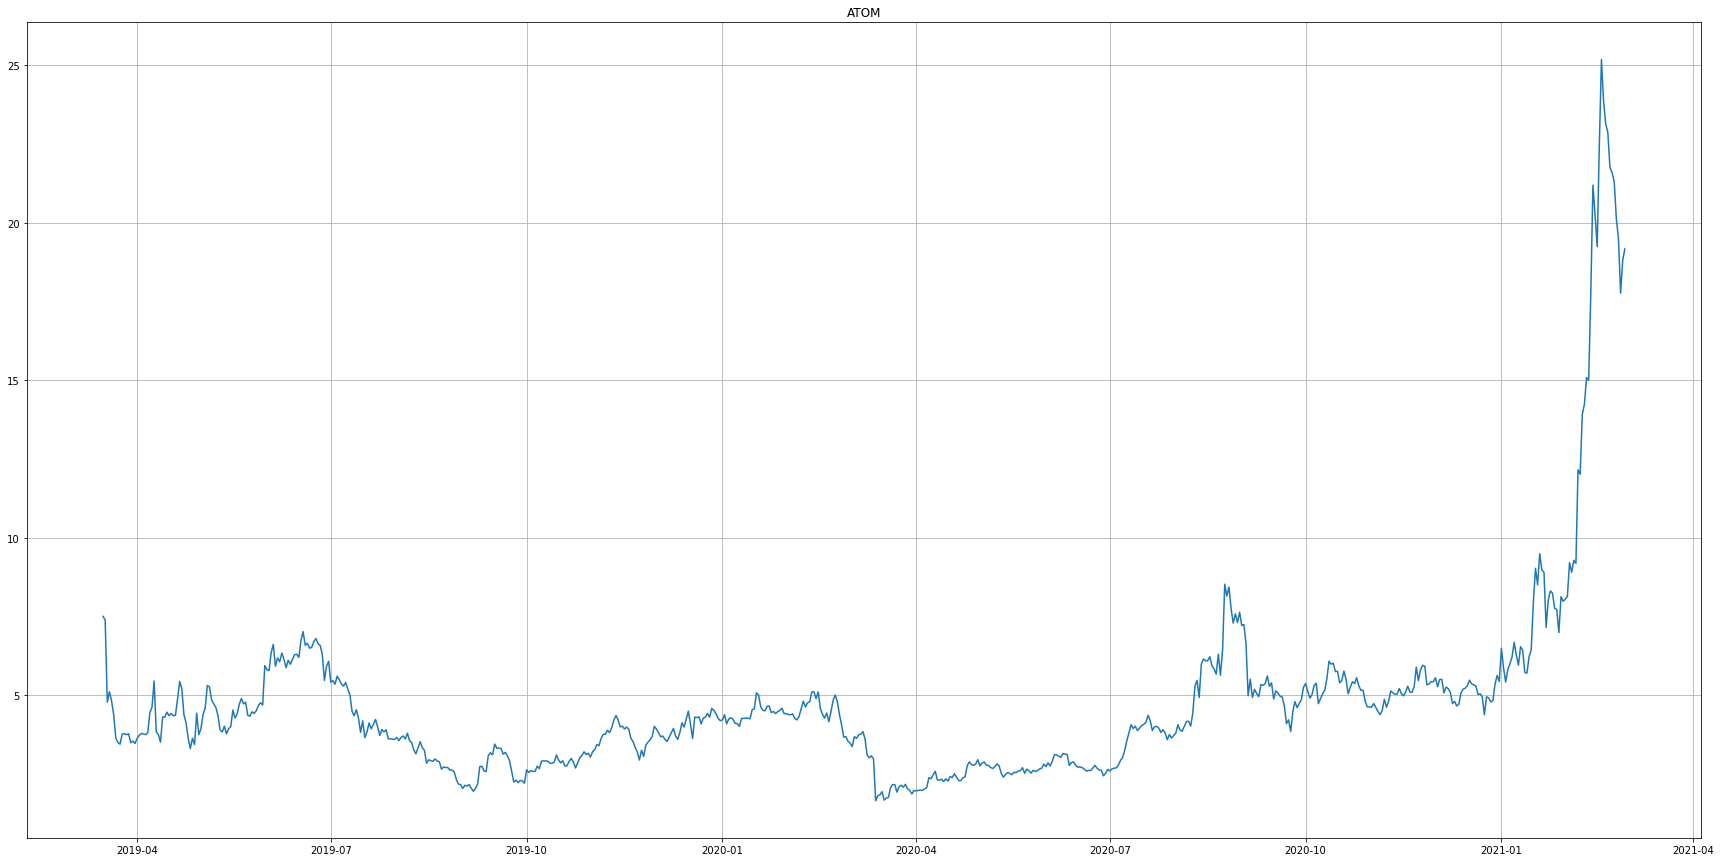

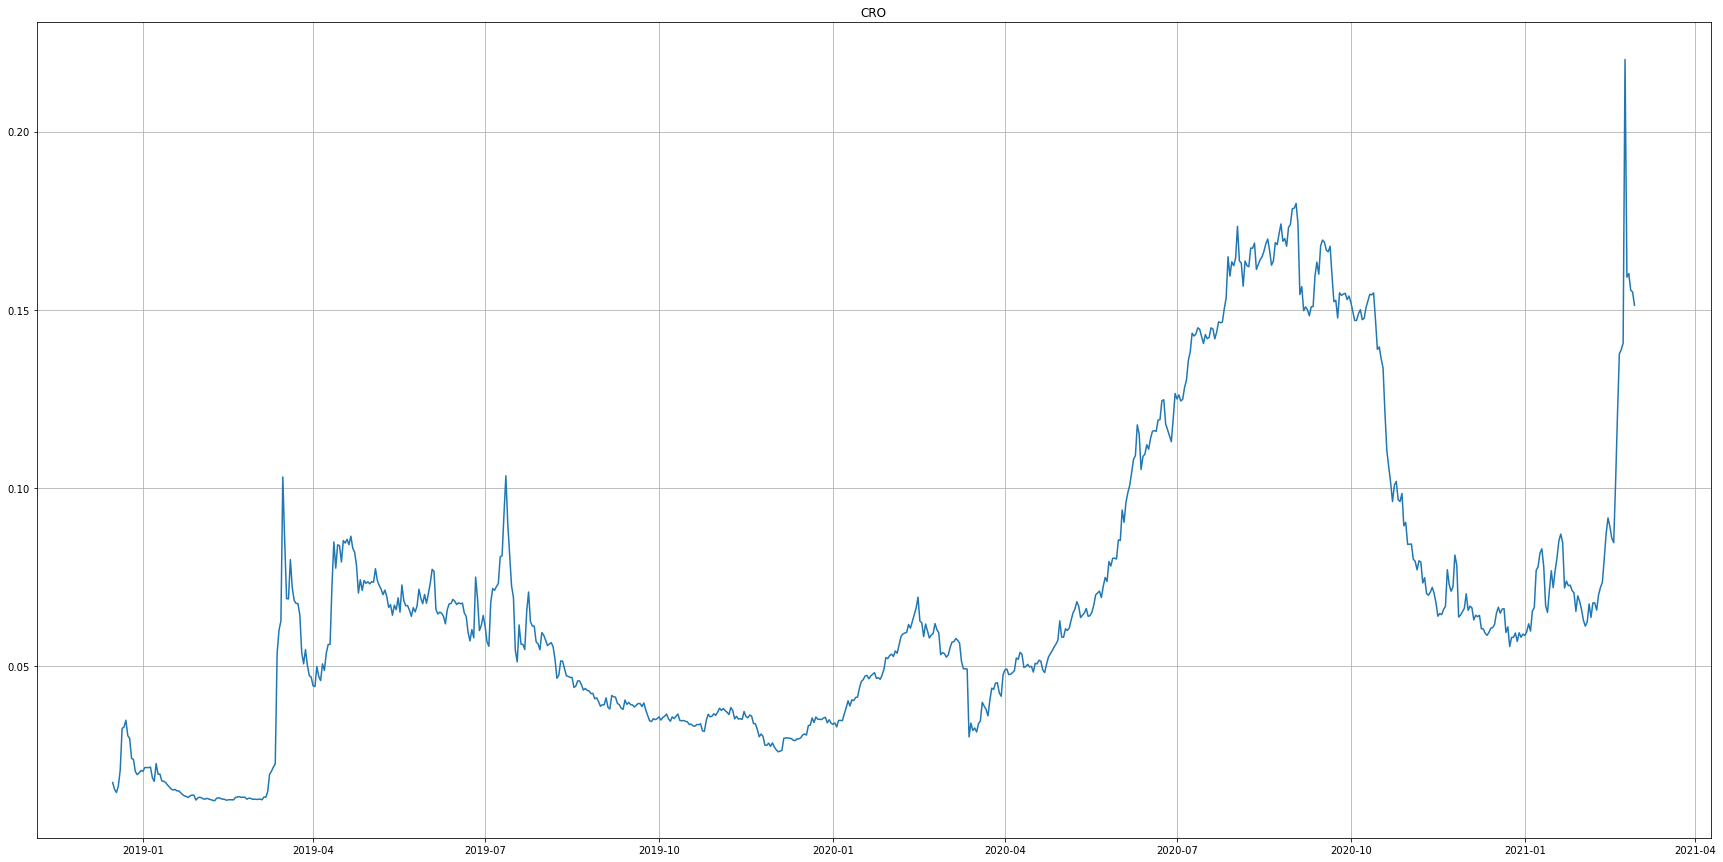

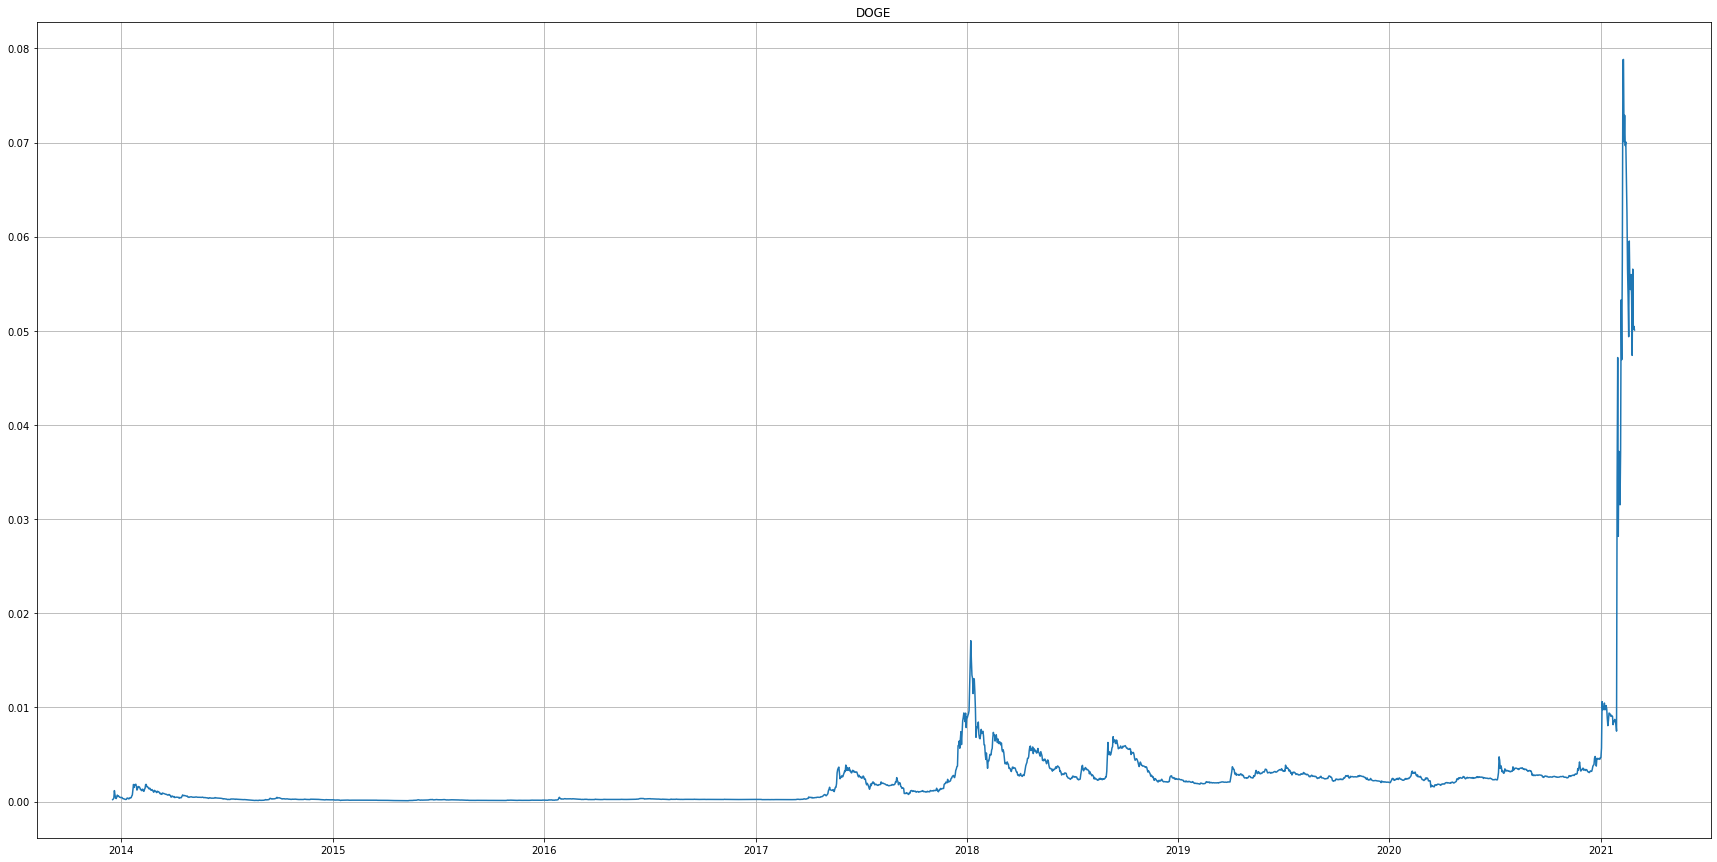

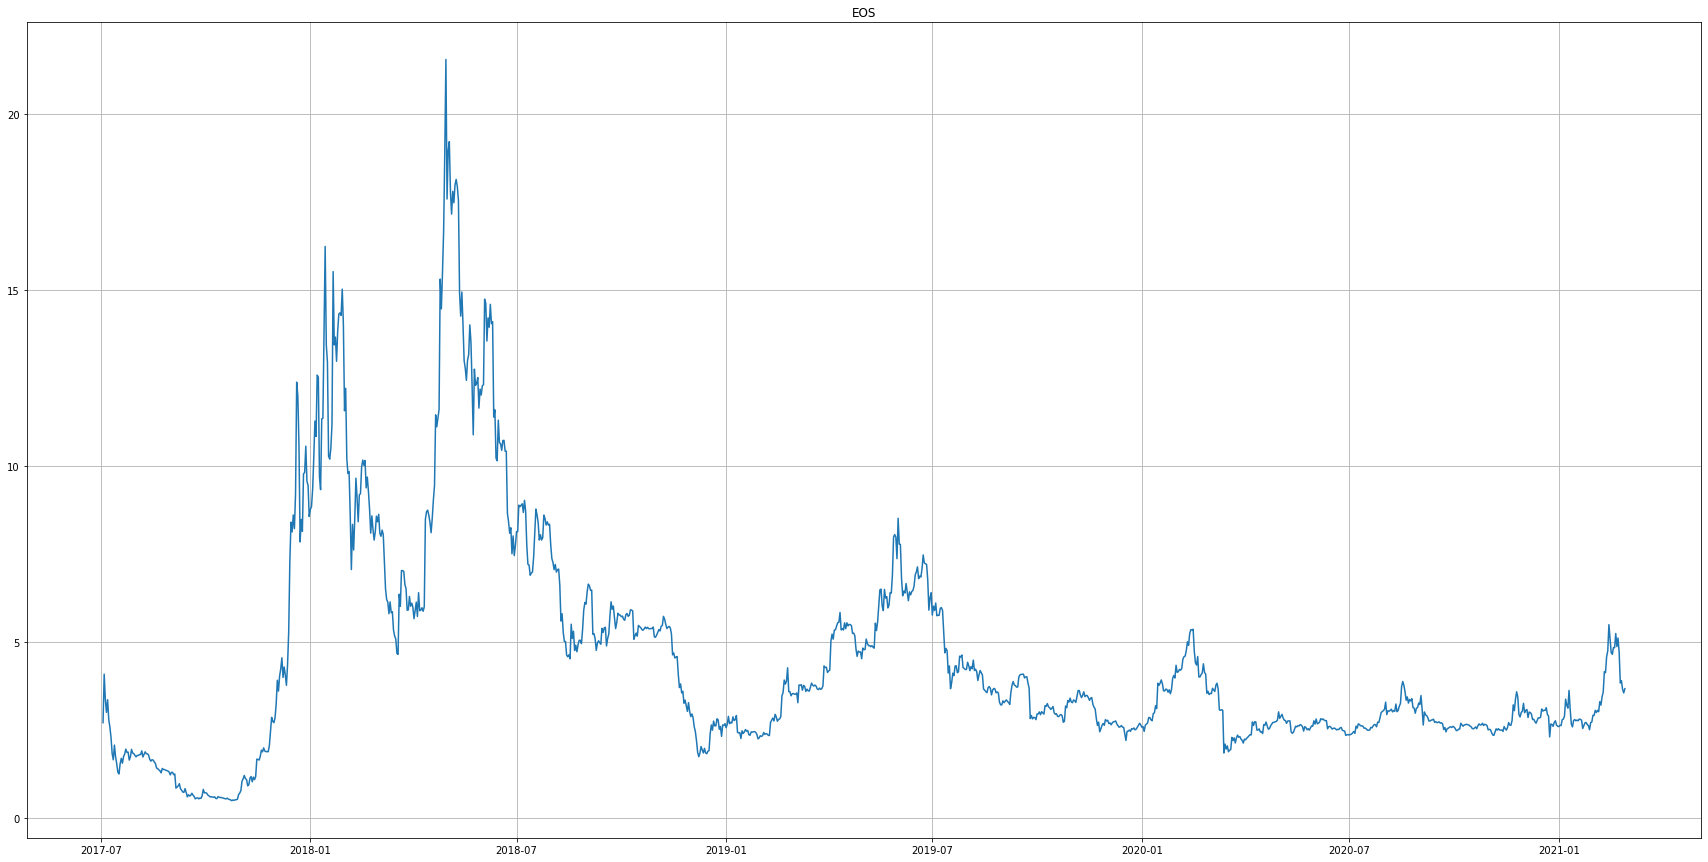

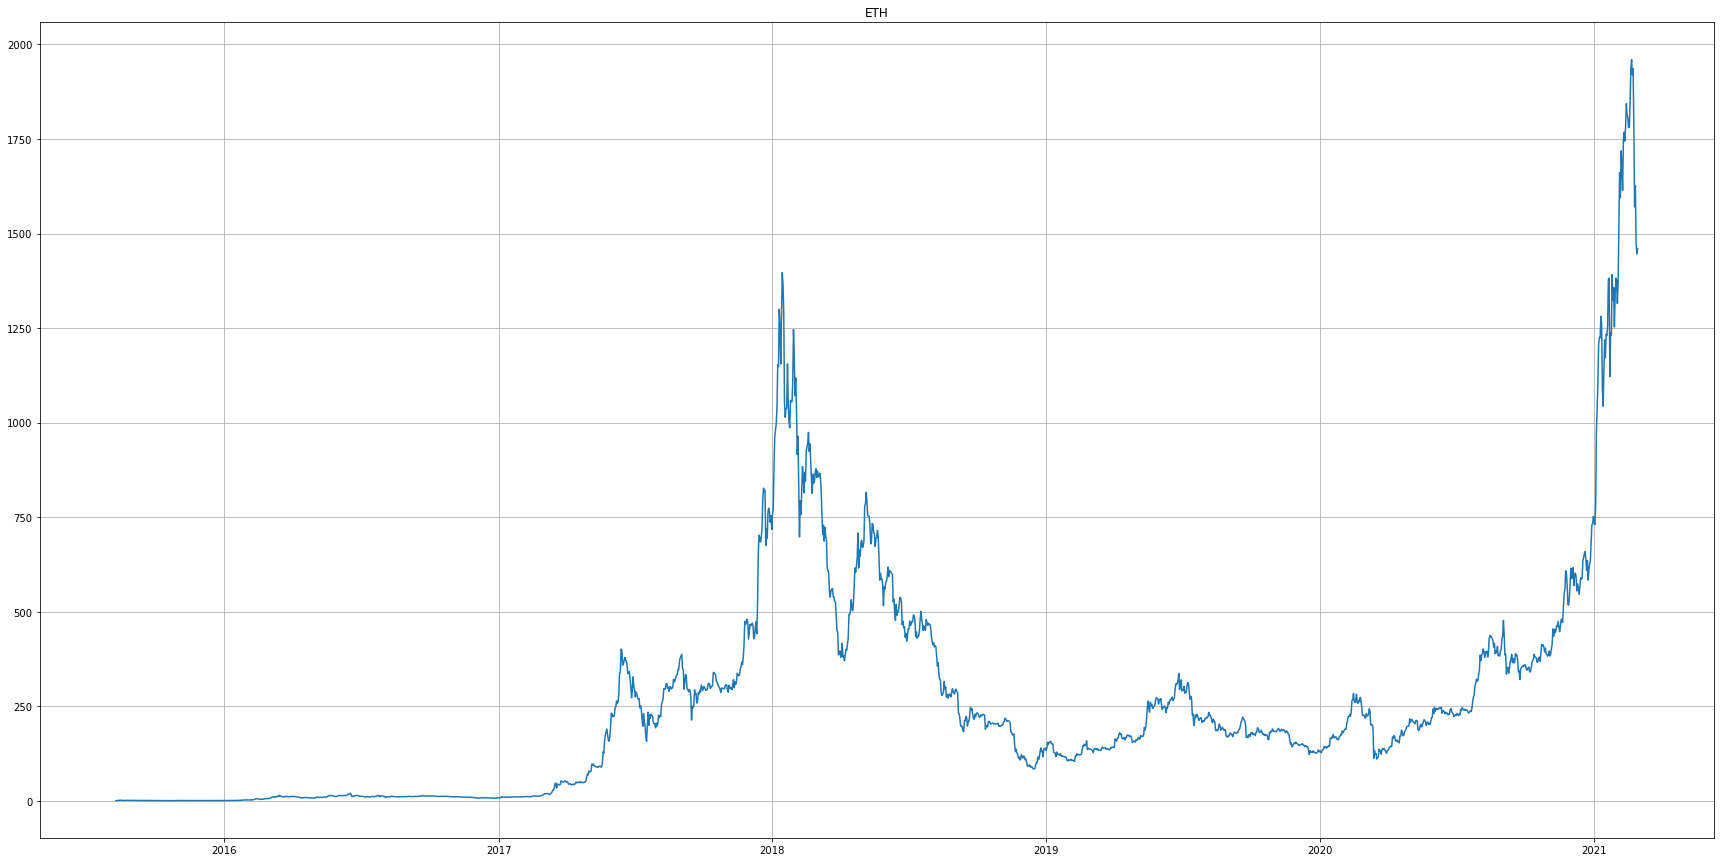

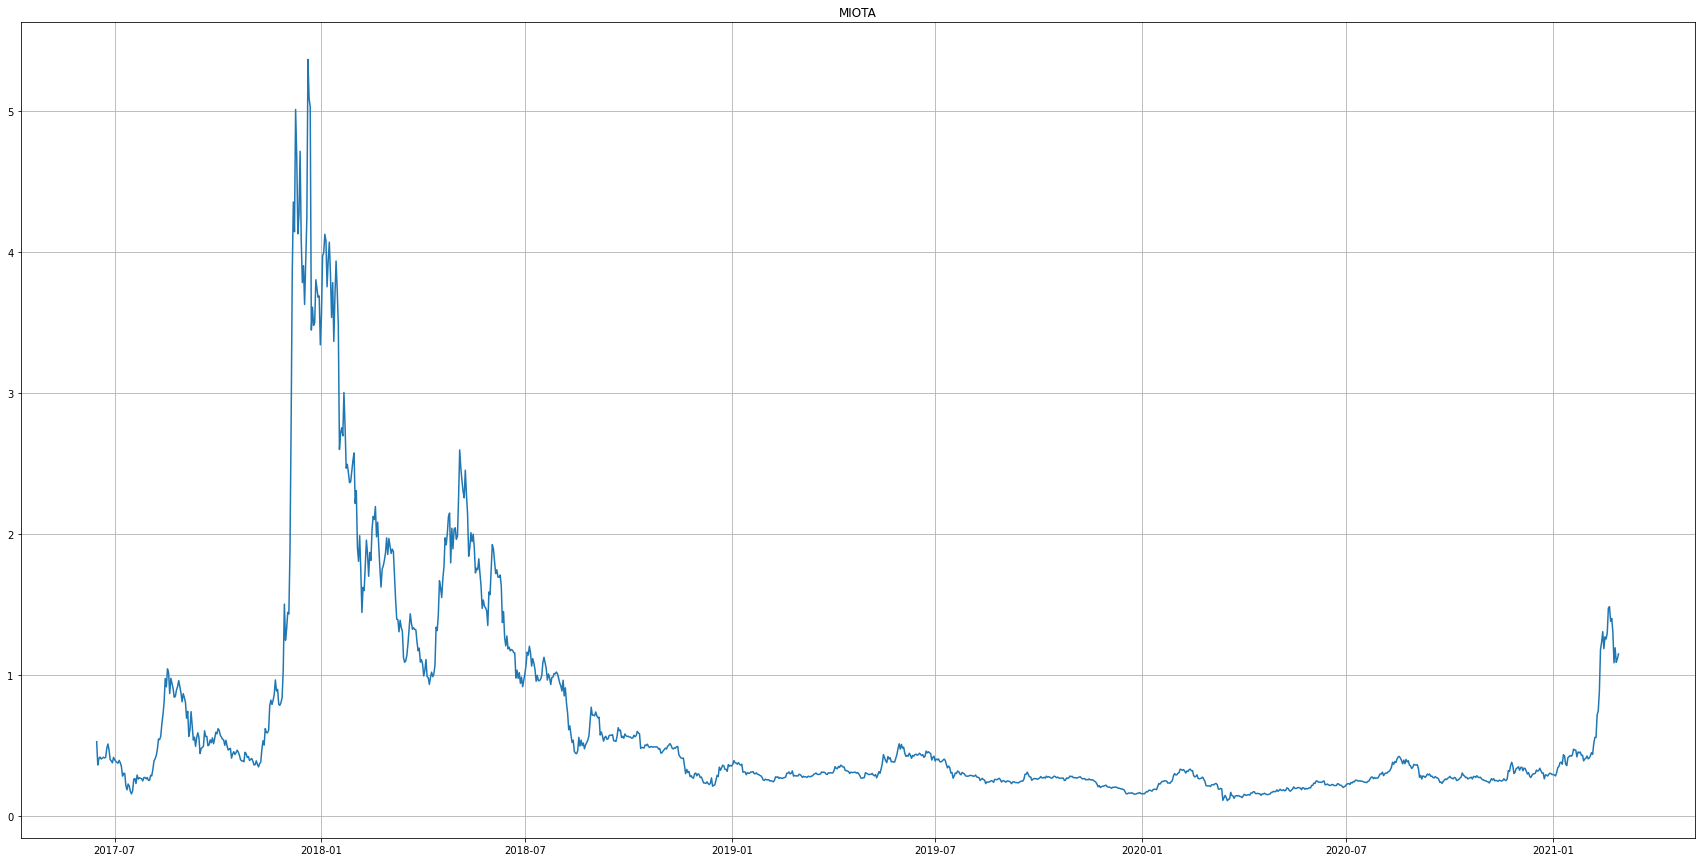

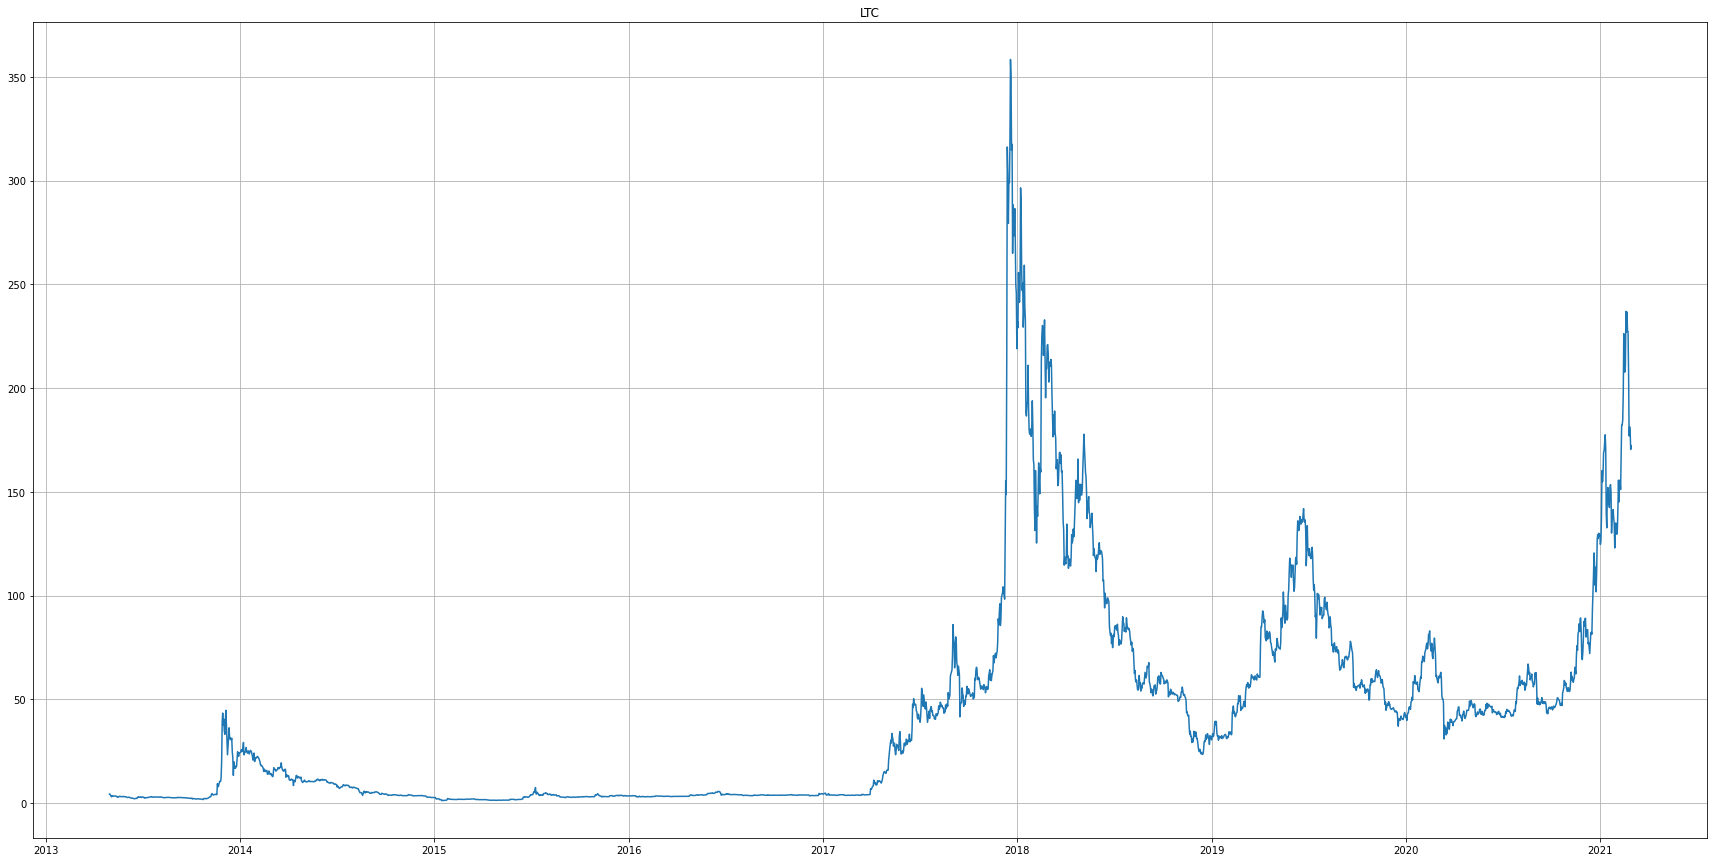

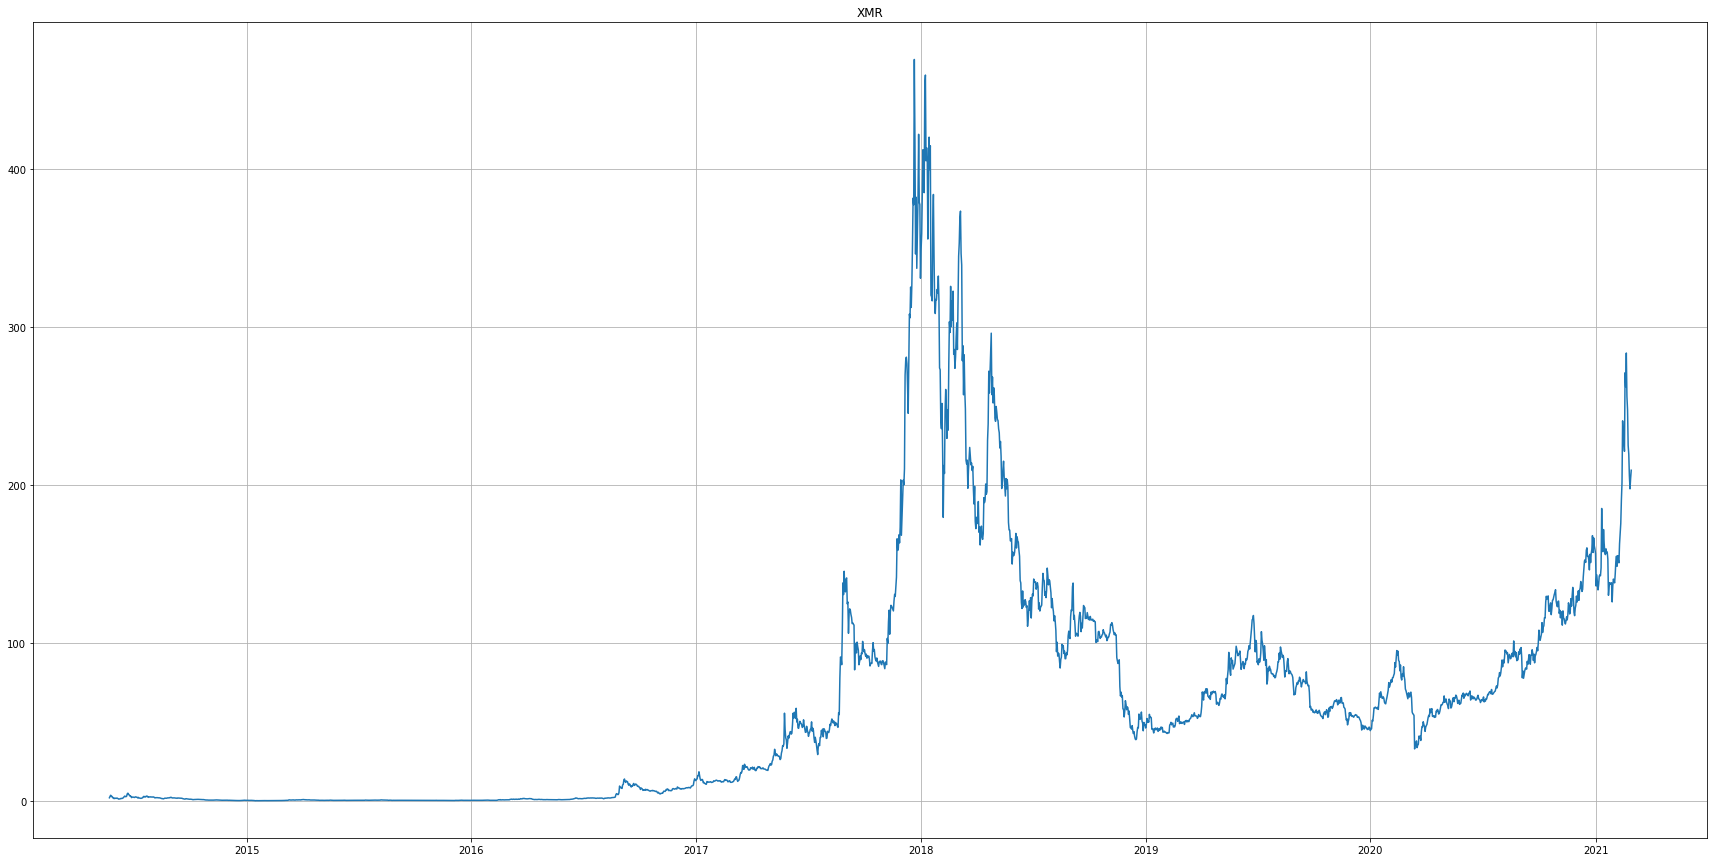

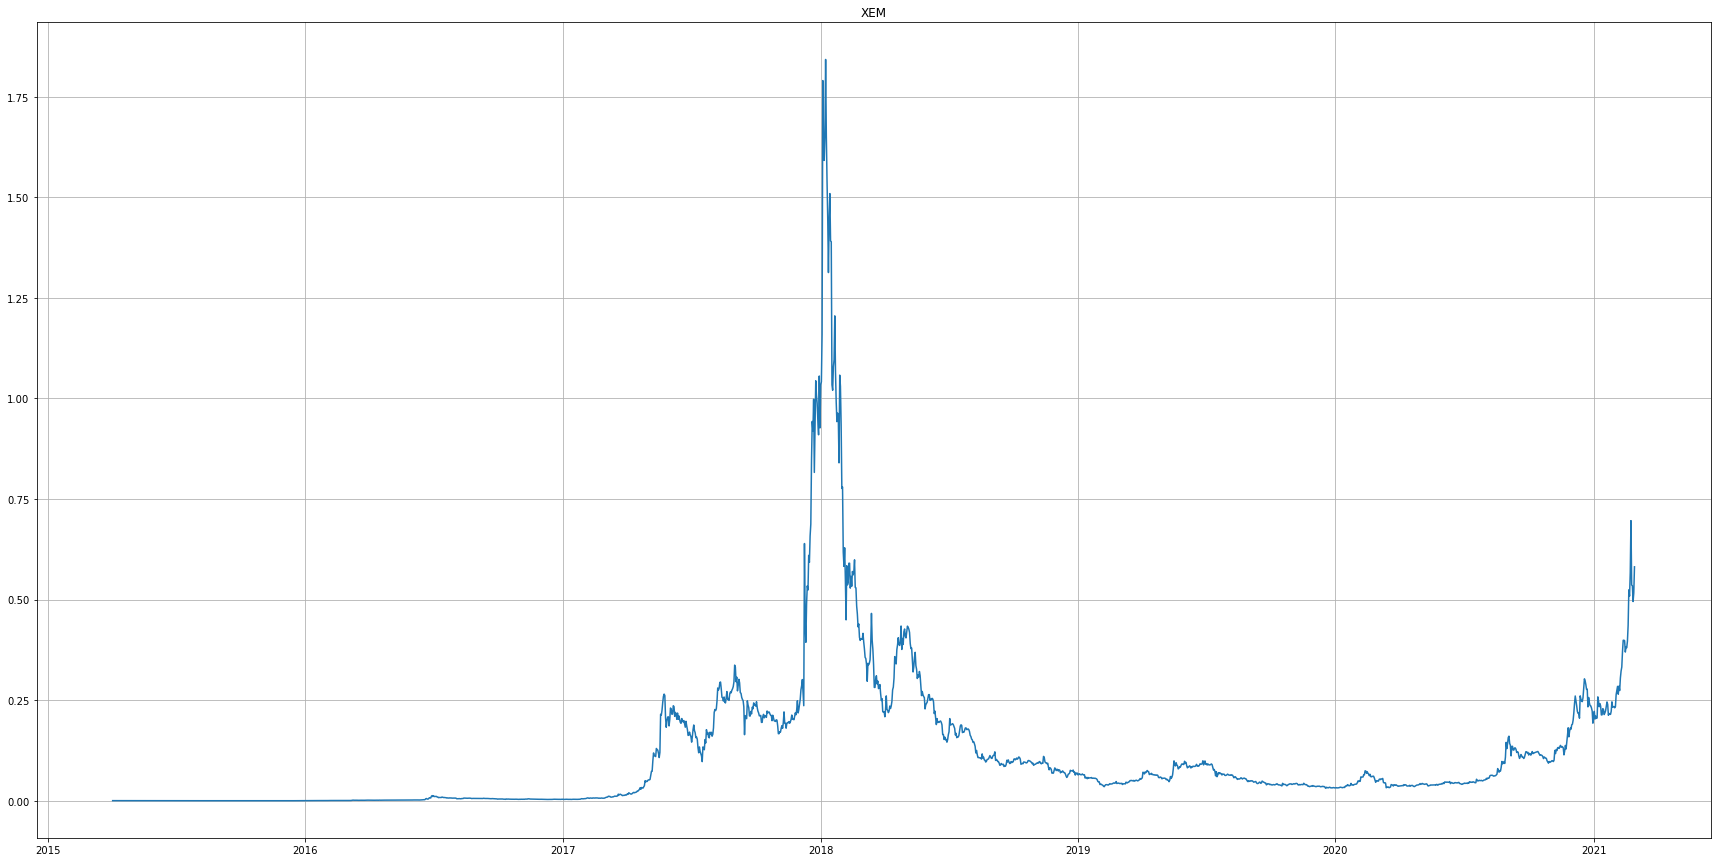

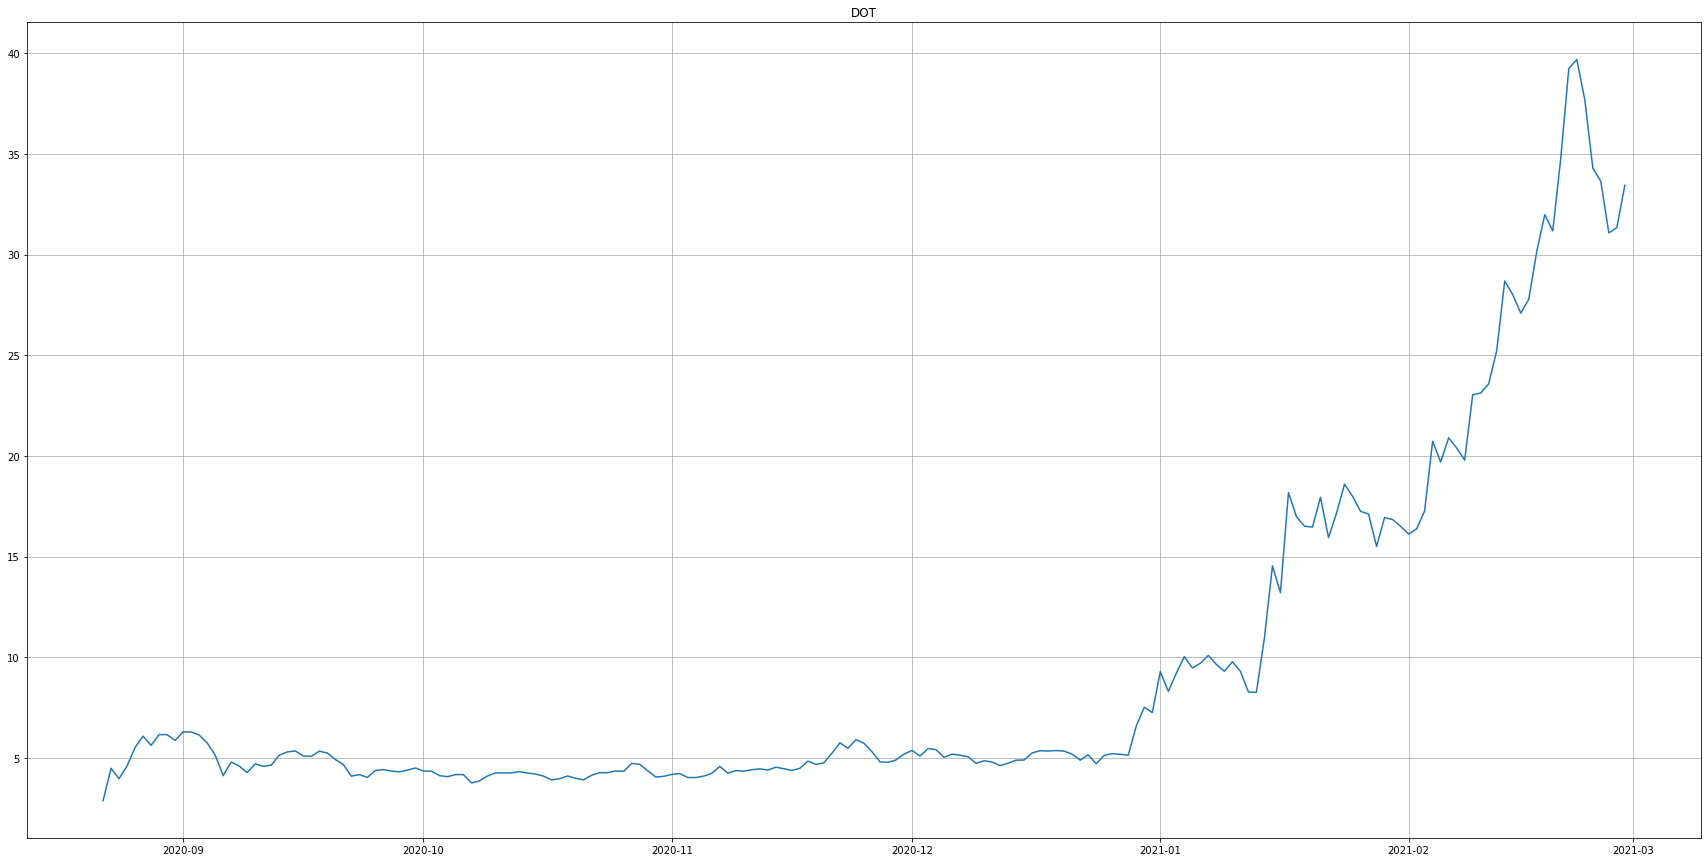

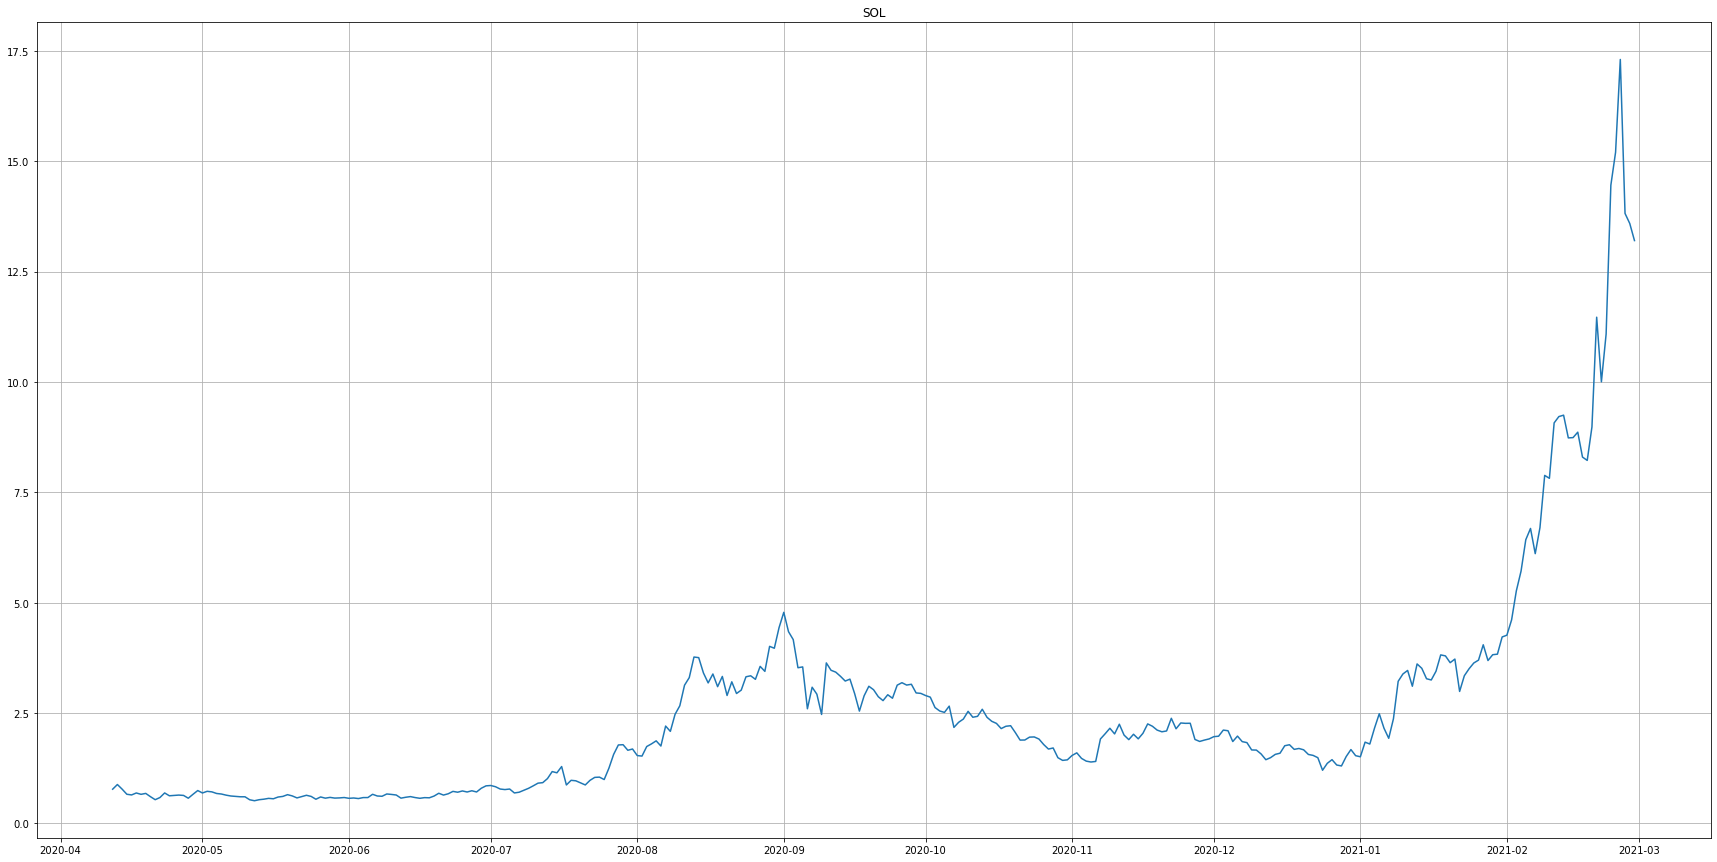

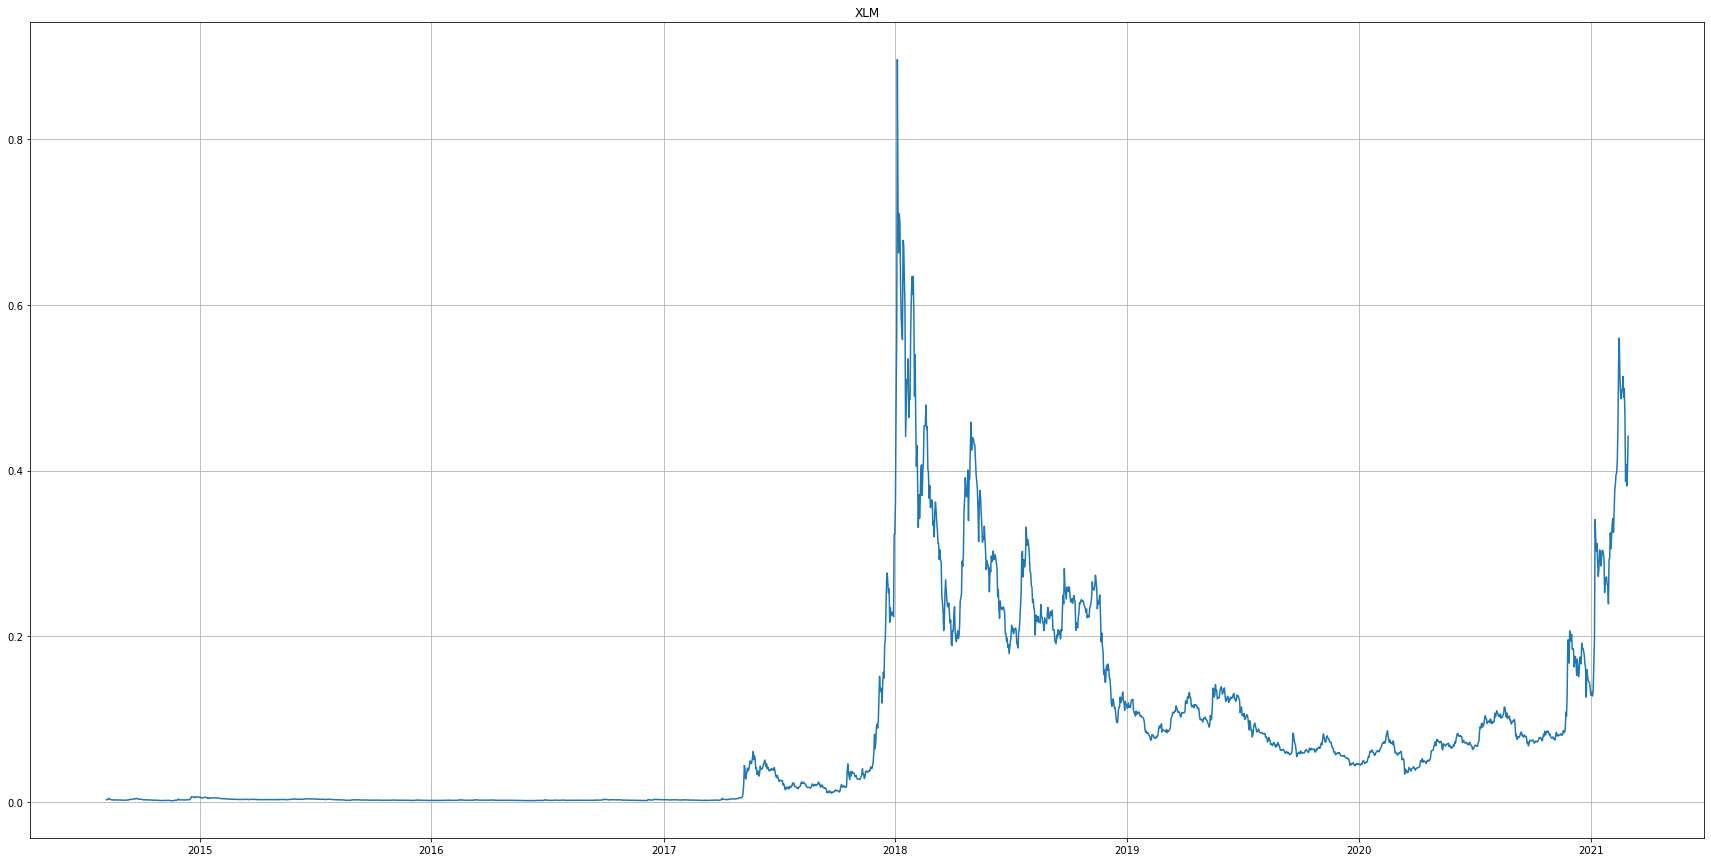

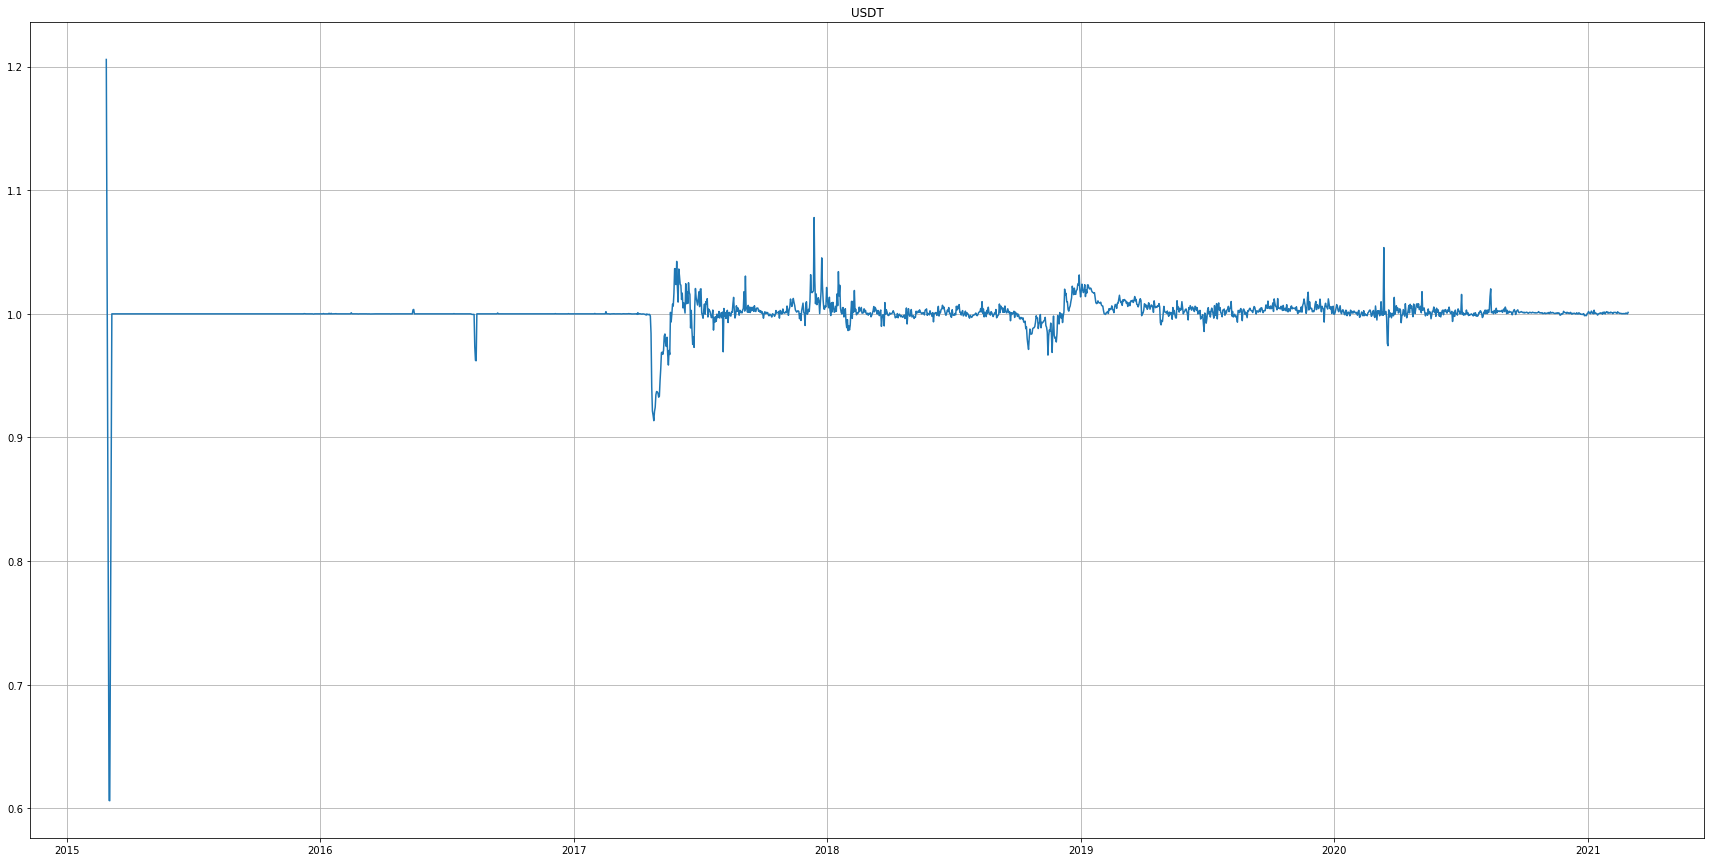

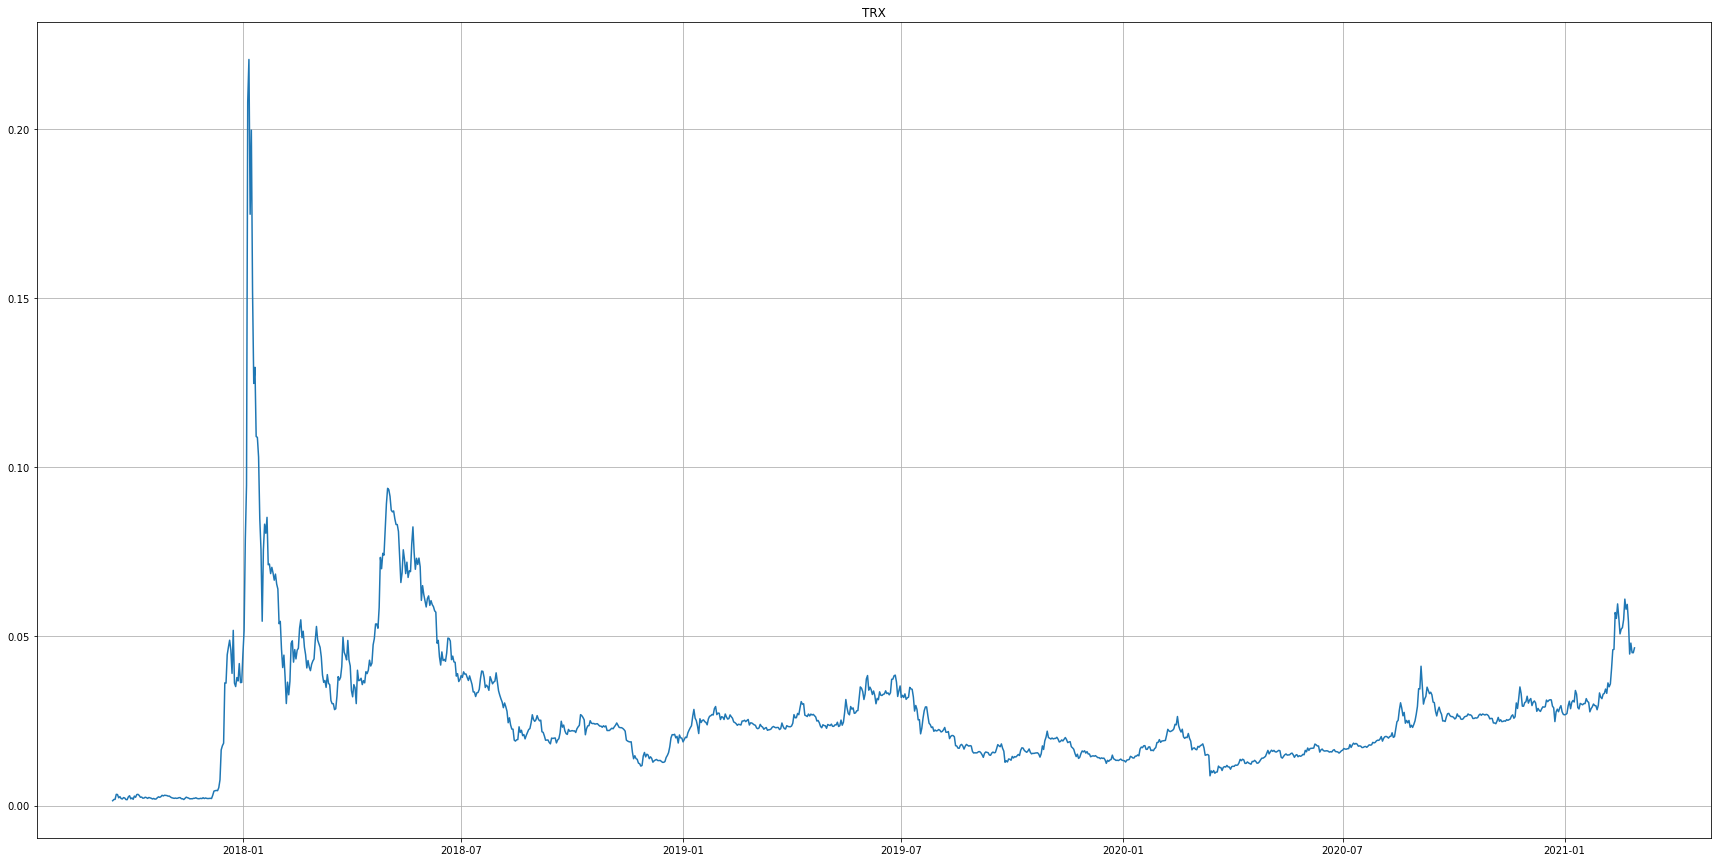

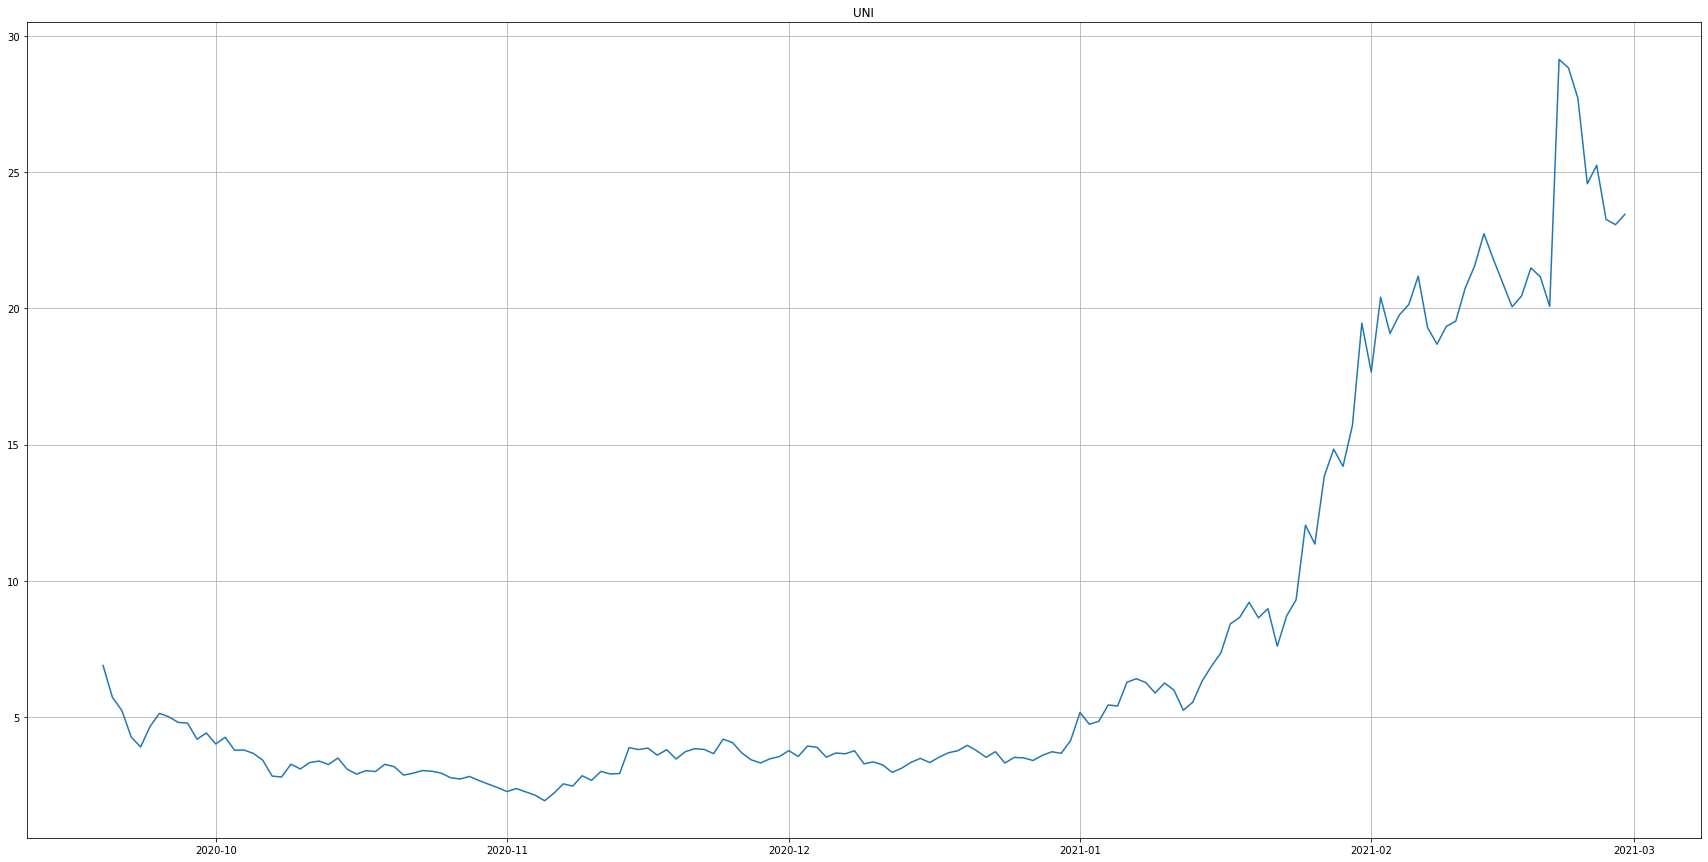

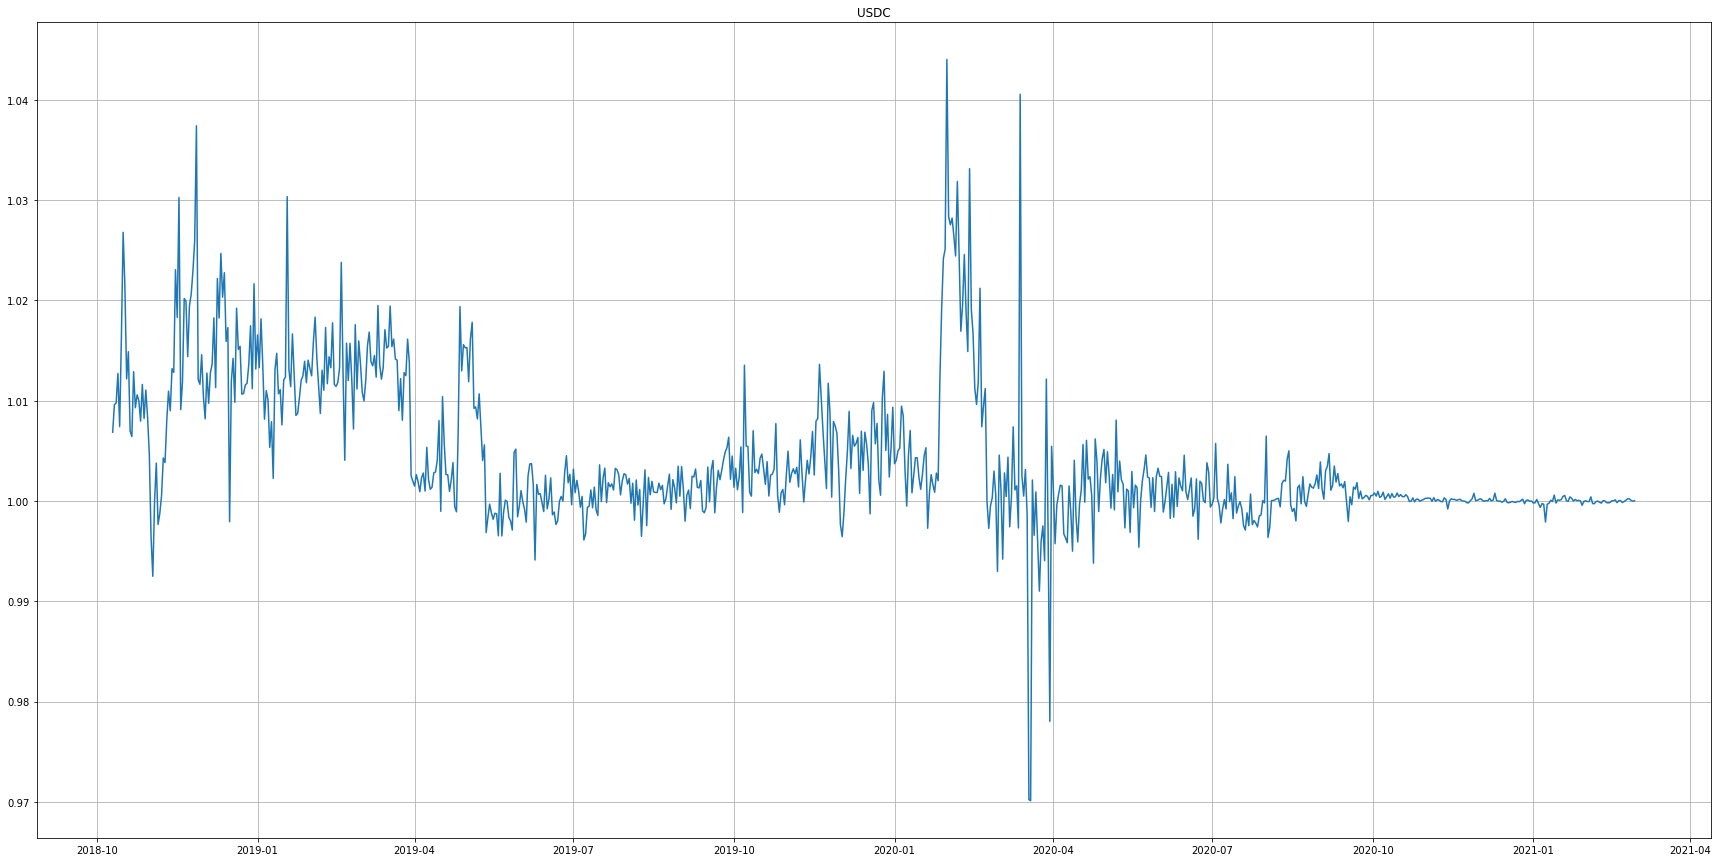

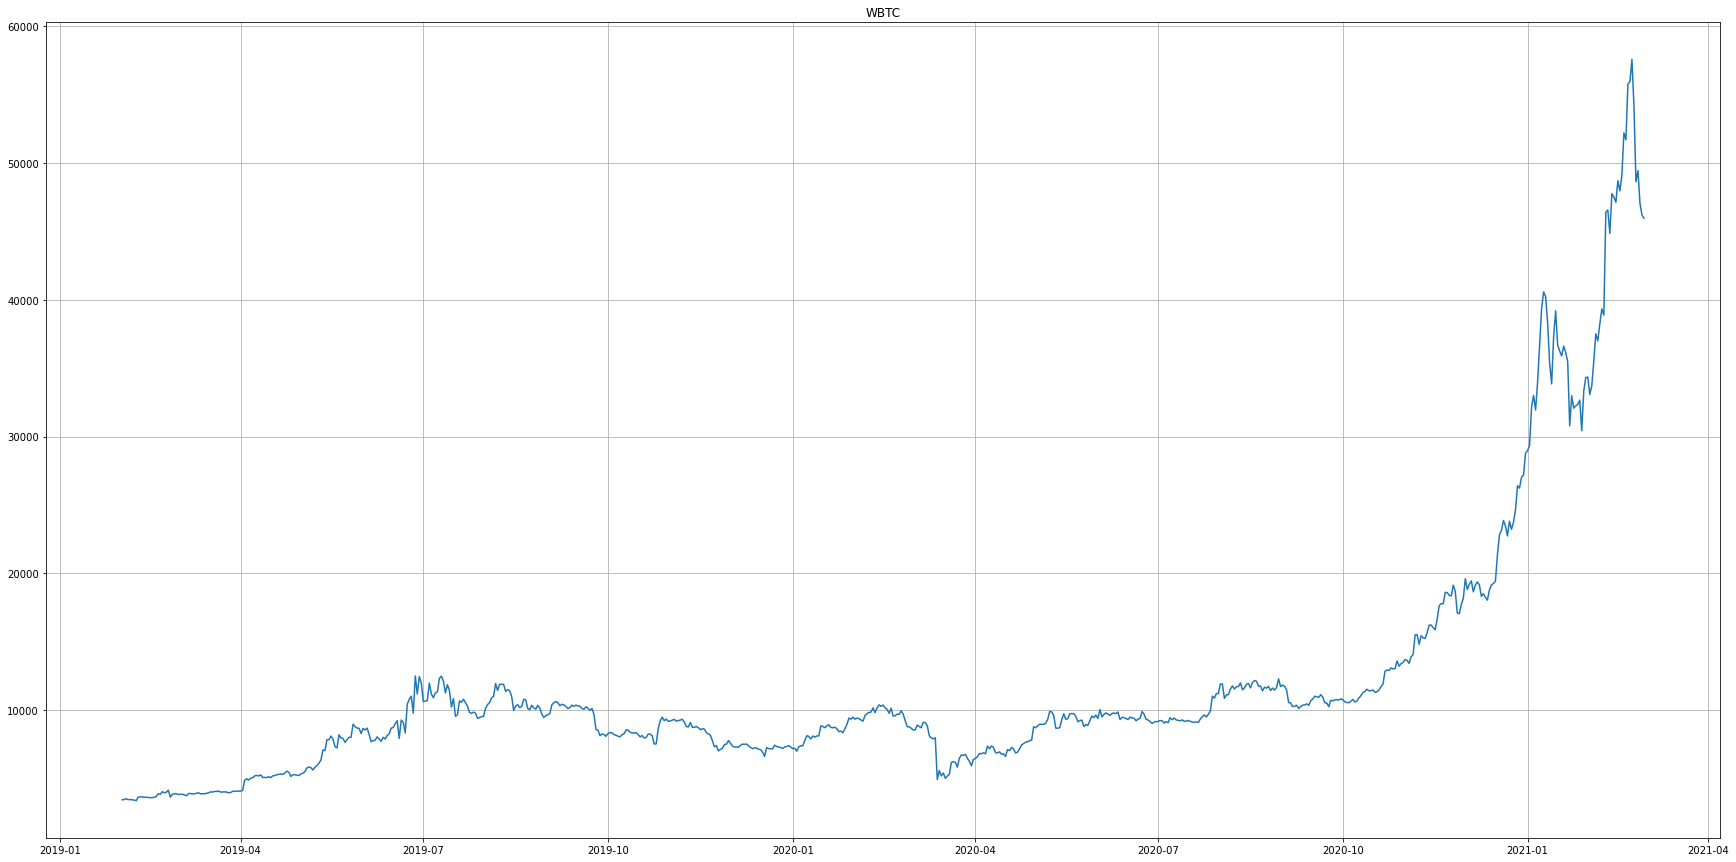

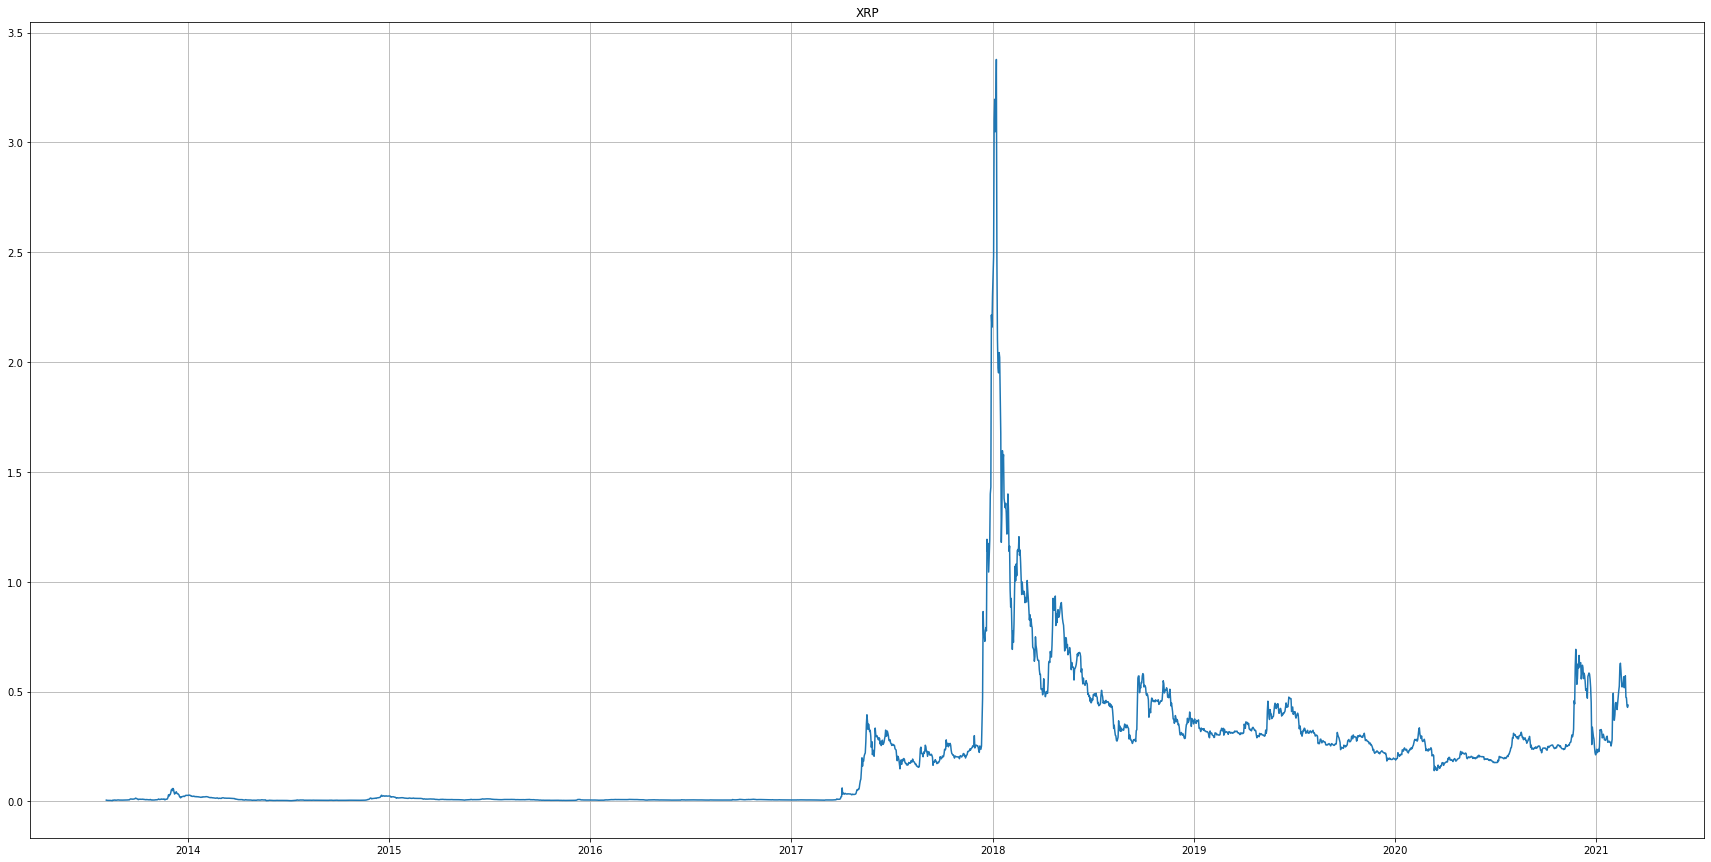

In [28]:
plt.rcParams["figure.figsize"] = (30, 15)
for i in total['Symbol'].unique():
    temp = total[total['Symbol'] == i][['Date', 'Close']]
    temp = temp.loc[temp['Close'].ne(0).idxmax():] # берем всё значения, начиная с первого ненулевого
    plt.title(i) # заголовок это название монетки
    plt.plot(temp.set_index('Date'))# чтобы по оси x автоматически стояли даты, мы выполняем используем метод .set_index('Date')
    plt.grid() # это команда для отображения клеточек на графике
    plt.show() # если убрать эту команду то все графики нарисуются на одной картинке
    